In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import re

In [2]:
df = pd.read_csv(r"data2.csv")
print(df.head())

   id  is_wiki_cited       stratum_id  PubYear  Code_Venue  leiden_field  \
0   0              1  11937-404-1-4-0     2006       11937           404   
1   1              0  1402-1916-1-3-0     2006        1402          1916   
2   2              0   2380-344-1-4-0     2006        2380           344   
3   3              0   3479-342-1-3-0     2006        3479           342   
4   4              0  12162-501-1-2-0     2006       12162           501   

   Nb_Author  is_oa  author_1_gender author_1_ctry  author_last_gender  \
0          9      0                1         Japan                   1   
1          7      0                1   Switzerland                   1   
2         10      0                2       Finland                   1   
3          6      0                1       Austria                   1   
4          2      0                2       Germany                   1   

  author_last_ctry  
0            Japan  
1      Switzerland  
2          Finland  
3          Aus

In [3]:
bdict = {'Australia': 1,
  'Canada': 1,
  'New Zealand': 1,
  'United Kingdom': 1,
  'United States': 1,}

df["author_1_sphere"] = df["author_1_ctry"].apply(lambda x:bdict[x] if x in bdict.keys() else 0)
df["author_last_sphere"] = df["author_last_ctry"].apply(lambda x:bdict[x] if x in bdict.keys() else 0)

In [4]:
# change the gender code (male:0, female:1)

df["author_1_gender"] = df["author_1_gender"].map({1:0,2:1})
df["author_last_gender"] = df["author_last_gender"].map({1:0,2:1})

In [5]:
# add leiden main field
df_leiden = pd.read_excel(r"CWTS Leiden Ranking 2021 - Micro-level fields.xlsx")
df_leiden.head()

,Micro-level field,No. of pub. (2000-2020),Avg. pub. year,Main field 1,Main field 2,Main field 3,Source 1,Source 2,Source 3,Source 4,Source 5,Term 1,Term 2,Term 3,Term 4,Term 5
0,0,59354,2004.818883,Biomedical and health sciences,NaN,NaN,american journal of physiology-heart and circu...,journal of biological chemistry,journal of physiology-london,european journal of pharmacology,british journal of pharmacology,inositol,calmodulin,sarcoplasmic reticulum,trisphosphate receptor,nitrotyrosine
1,1,51798,2011.137457,Life and earth sciences,NaN,NaN,acta petrologica sinica,precambrian research,lithos,ore geology reviews,gondwana research,monazite,rodinia,type granite,gold mineralization,zircon u pb
2,2,49053,2006.675473,Physical sciences and engineering,NaN,NaN,tetrahedron letters,journal of organic chemistry,organic letters,tetrahedron,synlett,stereoselective total synthesis,samarium diiodide,discodermolide,glycosidase inhibitor,asymmetric dihydroxylation
3,3,44319,2008.594079,Biomedical and health sciences,NaN,NaN,journal of virology,aids,aids research and human retroviruses,plos one,jaids-journal of acquired immune deficiency sy...,neutralizing antibody,gag,immunogenicity,t cell response,vaccine
4,4,43900,2009.665011,Physical sciences and engineering,NaN,NaN,carbon,applied physics letters,physical review b,nanotechnology,journal of physical chemistry c,poly,carbon nanotube field effect transistor,carbon nanotube growth,electrical property,field emission


In [6]:
'''
Biomedical and health sciences: BHS
Life and earth sciences: LES
Physical sciences and engineering: PSE
Social sciences and humanities: SSH
Mathematics and computer science: MCS
'''

fields = ["BHS","LES","PSE","MCS","SSH"]

df_field = pd.concat([df_leiden["Main field 1"],df_leiden["Main field 2"],df_leiden["Main field 3"]],axis=0).dropna().to_frame()
df_field_bio = df_field[df_field[0]=="Biomedical and health sciences"]
df_field_life = df_field[df_field[0]=="Life and earth sciences"]
df_field_phy = df_field[df_field[0]=="Physical sciences and engineering"]
df_field_mat = df_field[df_field[0]=="Mathematics and computer science"]
df_field_sh = df_field[df_field[0]=="Social sciences and humanities"]

df_field_bio["BHS"] = 1
df_field_life["LES"] = 1
df_field_phy["PSE"] = 1
df_field_mat["MCS"] = 1
df_field_sh["SSH"] = 1

df_field

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/3913787764.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_field_bio["BHS"] = 1
C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/3913787764.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_field_life["LES"] = 1
C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/3913787764.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,0
0,Biomedical and health sciences
1,Life and earth sciences
2,Physical sciences and engineering
3,Biomedical and health sciences
4,Physical sciences and engineering
...,...
3520,Biomedical and health sciences
3712,Life and earth sciences
3817,Physical sciences and engineering
3995,Life and earth sciences


In [7]:
df2 = pd.merge(df, df_field_bio["BHS"], how="left",left_on="leiden_field",right_index=True)
df2 = pd.merge(df2, df_field_life["LES"], how="left",left_on="leiden_field",right_index=True)
df2 = pd.merge(df2, df_field_phy["PSE"], how="left",left_on="leiden_field",right_index=True)
df2 = pd.merge(df2, df_field_sh["SSH"], how="left",left_on="leiden_field",right_index=True)
df2 = pd.merge(df2, df_field_mat["MCS"], how="left",left_on="leiden_field",right_index=True)
df2[fields] = df2[fields].fillna(0)

In [8]:
# dummy the pubyear
df4 = pd.concat([df2,pd.get_dummies(df2["PubYear"])], axis=1)

df4.iloc[:,-20:]

,LES,PSE,SSH,MCS,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099047,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2099048,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2099049,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2099050,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
#split the df into single author and multi author

df_single = df4[df4["Nb_Author"] == 1]
df_multi =  df4[df4["Nb_Author"] > 1]

# deal with the single df

In [11]:
df_single["bin_sig"] = df_single.apply(lambda x:"-".join([x["stratum_id"],str(x["author_1_sphere"])]),axis=1)
strata_num = pd.pivot_table(df_single,values="id",index="bin_sig",columns="is_wiki_cited",aggfunc=lambda x: len(x.unique()))
strata_num

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/1760432503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single["bin_sig"] = df_single.apply(lambda x:"-".join([x["stratum_id"],str(x["author_1_sphere"])]),axis=1)


is_wiki_cited,0,1
bin_sig,,
1-816-2-1-0-0,3.0,NaN
10001-346-1-1-0-0,2.0,NaN
10001-346-1-1-0-1,1.0,1.0
10003-1155-4-1-0-1,1.0,1.0
10003-148-1-1-0-1,2.0,1.0
...,...,...
9993-376-3-1-0-1,1.0,1.0
9993-503-2-1-0-1,1.0,1.0
9993-572-2-1-0-1,1.0,1.0


In [12]:
strata_num_dropna = strata_num.dropna()
strata_num_dropna

is_wiki_cited,0,1
bin_sig,,
10001-346-1-1-0-1,1.0,1.0
10003-1155-4-1-0-1,1.0,1.0
10003-148-1-1-0-1,2.0,1.0
10003-375-1-1-1-1,1.0,1.0
10004-322-2-1-0-1,1.0,1.0
...,...,...
9993-376-3-1-0-1,1.0,1.0
9993-503-2-1-0-1,1.0,1.0
9993-572-2-1-0-1,1.0,1.0


In [13]:
sum1 = strata_num_dropna[1].sum()
sum0 = strata_num_dropna[0].sum()

In [14]:
# add weights

strata_num_dropna["w"] = (strata_num_dropna[1]/sum1)/(strata_num_dropna[0]/sum0)
strata_num_dropna["w2"] = 1
strata_num_dropna

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/485156338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_num_dropna["w"] = (strata_num_dropna[1]/sum1)/(strata_num_dropna[0]/sum0)
C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/485156338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_num_dropna["w2"] = 1


is_wiki_cited,0,1,w,w2
bin_sig,,,,
10001-346-1-1-0-1,1.0,1.0,6.216287,1
10003-1155-4-1-0-1,1.0,1.0,6.216287,1
10003-148-1-1-0-1,2.0,1.0,3.108143,1
10003-375-1-1-1-1,1.0,1.0,6.216287,1
10004-322-2-1-0-1,1.0,1.0,6.216287,1
...,...,...,...,...
9993-376-3-1-0-1,1.0,1.0,6.216287,1
9993-503-2-1-0-1,1.0,1.0,6.216287,1
9993-572-2-1-0-1,1.0,1.0,6.216287,1


In [15]:
a1 = pd.merge(df_single[df_single["is_wiki_cited"]==0],strata_num_dropna["w"],how="inner",left_on="bin_sig",right_index=True)
a2 = pd.merge(df_single[df_single["is_wiki_cited"]==1],strata_num_dropna["w2"],how="inner",left_on="bin_sig",right_index=True)
a2.rename(columns={"w2": "w"},inplace=True)
df_single_new = pd.concat([a1,a2],axis=0,ignore_index=True).drop_duplicates()
df_single_new

,id,is_wiki_cited,stratum_id,PubYear,Code_Venue,leiden_field,Nb_Author,is_oa,author_1_gender,author_1_ctry,...,2013,2014,2015,2016,2017,2018,2019,2020,bin_sig,w
0,10,0,7733-898-1-1-0,2006,7733,898,1,0,1,United States,...,0,0,0,0,0,0,0,0,7733-898-1-1-0-1,0.981519
1,3186,0,7733-898-1-1-0,2006,7733,898,1,0,1,United States,...,0,0,0,0,0,0,0,0,7733-898-1-1-0-1,0.981519
2,8441,0,7733-898-1-1-0,2006,7733,898,1,0,1,United States,...,0,0,0,0,0,0,0,0,7733-898-1-1-0-1,0.981519
3,18211,0,7733-898-1-1-0,2006,7733,898,1,0,0,United States,...,0,0,0,0,0,0,0,0,7733-898-1-1-0-1,0.981519
4,18225,0,7733-898-1-1-0,2006,7733,898,1,0,0,Canada,...,0,0,0,0,0,0,0,0,7733-898-1-1-0-1,0.981519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135488,2098722,1,5143-556-2-1-0,2010,5143,556,1,0,1,United Kingdom,...,0,0,0,0,0,0,0,0,5143-556-2-1-0-1,1.000000
135489,2098765,1,407-1629-4-1-0,2017,407,1629,1,0,0,United States,...,0,0,0,0,1,0,0,0,407-1629-4-1-0-1,1.000000
135490,2098891,1,19740-2065-3-1-0,2016,19740,2065,1,0,0,United Kingdom,...,0,0,0,1,0,0,0,0,19740-2065-3-1-0-1,1.000000
135491,2098934,1,2410-1668-2-1-0,2012,2410,1668,1,0,1,United States,...,0,0,0,0,0,0,0,0,2410-1668-2-1-0-1,1.000000


In [16]:
# by field # by continent

sphere = {0:"Non-Anglo",1:"Anglo"} # whether from five eyes
genders = {0:"Male",1:"Female"} # 1 male 2 female
groups = {1:"Cited",0:"Uncited"}
#quartiles = ["Q1","Q2","Q3","Q4","unranked"]

def single_gender(g): # 1 Female / 0 Male
    t = pd.DataFrame(index=fields+["All fields"],
                     columns=pd.MultiIndex.from_product([list(sphere.values())+["All"],list(groups.values())+["Relative difference"]]))

    for w in [0,1]: #is_wiki_cited
        for f in fields:
            for c in sphere:
                subdf = df_single_new[(df_single_new["is_wiki_cited"]==w)
                                      & (df_single_new[f]==1)
                                      & (df_single_new["author_1_sphere"]==c)]
                a = subdf.loc[(subdf["author_1_gender"]==g),"w"].sum()/subdf["w"].sum()
                b = len(subdf)
                print(w,f,c,b)
                t.loc[f,(sphere[c],groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        for f in fields:
            subdf = df_single_new[(df_single_new["is_wiki_cited"]==w)
                                  & (df_single_new[f]==1)]
            a = subdf.loc[(subdf["author_1_gender"]==g),"w"].sum()/subdf["w"].sum()
            t.loc[f,("All",groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        for c in sphere:
            subdf = df_single_new[(df_single_new["is_wiki_cited"]==w)
                                  & (df_single_new["author_1_sphere"]==c)]
            a = subdf.loc[(subdf["author_1_gender"]==g),"w"].sum()/subdf["w"].sum()
            t.loc["All fields",(sphere[c],groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        subdf = df_single_new[(df_single_new["is_wiki_cited"]==w)]
        a = subdf.loc[(subdf["author_1_gender"]==g),"w"].sum()/subdf["w"].sum()
        t.loc["All fields",("All",groups[w])] = a

    for s in ["Non-Anglo","Anglo","All"]:
        t.loc[:,(s,"Relative difference")] = (t.loc[:,(s,"Cited")] -t.loc[:,(s,"Uncited")])/ t.loc[:,(s,"Uncited")]
      
    return t.applymap(lambda x: x*100)

single_gender(1)

0 BHS 0 1793
0 BHS 1 8589
0 LES 0 4256
0 LES 1 6270
0 PSE 0 5845
0 PSE 1 4625
0 MCS 0 3025
0 MCS 1 3876
0 SSH 0 16904
0 SSH 1 72684
1 BHS 0 757
1 BHS 1 2825
1 LES 0 1479
1 LES 1 2127
1 PSE 0 827
1 PSE 1 892
1 MCS 0 513
1 MCS 1 664
1 SSH 0 2518
1 SSH 1 8873


Non-Anglo                                     Anglo             \
                Cited    Uncited Relative difference      Cited    Uncited   
BHS         24.306473  25.495984           -4.665486  30.017699  31.577991   
LES         21.974307  23.938947           -8.206879  22.755054  23.843039   
PSE          9.310762  17.072280          -45.462694  10.313901  11.917093   
MCS         13.645224  17.863037          -23.611958  18.072289  19.898596   
SSH         30.142971  34.438704          -12.473562  36.909726  37.977700   
All fields  23.325809  26.846110          -13.112892  31.515602  32.454913   

                                      All                                 
           Relative difference      Cited    Uncited Relative difference  
BHS                  -4.941075  28.810720  30.292654           -4.892056  
LES                  -4.563114  22.434831  23.882376           -6.061143  
PSE                 -13.452872   9.831297  14.397221          -31.713923  
MCS                  -9.178068  16.142736  19.011390          -15.089133  
SSH                  -2.812109  35.413923  37.195399           -4.789506  
All fields           -2.894203  29.196847  30.866907           -5.410520

In [17]:
# make a supplementary table

def single_si_tab(df=df_single_new,
                  first_col= {1:"Female",0:"Male",},
                  first_property = "author_1_gender",
                  second_col={"[0]":"NAS","[1]":"AS","[0,1]":"All"},
                  second_property = "author_1_sphere",
                  col_name = ["Gender","Country","Weighted"],
                 ):

    df["All fields"] = 1
    third_col = ["#","%"]
    first_row = fields+["All fields"]
    second_row = ["Wiki-cite","Control","rd"]
    second_row_map = {1:"Wiki-cite",0:"Control"}

    tab_index = pd.MultiIndex.from_product([first_row, second_row])
    tab_col = pd.MultiIndex.from_product([first_col.values(),second_col.values(),third_col], names=col_name)

    t = pd.DataFrame(index=tab_index, columns=tab_col)

    for w in second_row_map.keys(): #is_wiki_cited
        for f in first_row:
            for g in first_col.keys():
                for c in second_col.keys():
                    subdf = df[(df["is_wiki_cited"]==w)
                                   & (df[f]==1)
                                   & (df[second_property].isin(eval(c)))]
                    num = subdf.loc[(subdf[first_property]==g),"w"].sum()
                    perc = num / subdf["w"].sum() * 100
                    t.loc[(f, second_row_map[w]),(first_col[g], second_col[c], "#")] = num
                    t.loc[(f, second_row_map[w]),(first_col[g], second_col[c], "%")] = perc

    for f in first_row:
        for g in first_col.keys():
            for c in second_col.keys():
                p_wiki = t.loc[(f, "Wiki-cite"),(first_col[g], second_col[c], "%")]
                p_ctrl = t.loc[(f, "Control"),(first_col[g], second_col[c], "%")]
                rd = (p_wiki - p_ctrl) / p_ctrl * 100
                t.loc[(f, "rd"),(first_col[g], second_col[c], "%")] = rd

    return t.applymap(lambda x: round(x,1) if x != np.nan else x)

si_t1 = single_si_tab(df=df_single_new,
                  first_col= {0:"Male",1:"Female"},
                  first_property = "author_1_gender",
                  second_col={"[0]":"NAS","[1]":"AS","[0,1]":"All"},
                  second_property = "author_1_sphere",
                  col_name = ["Gender","Country","Weighted"],
                 )

si_t1

Gender                   Male                                      Female  \
Country                   NAS             AS            All           NAS   
Weighted                    #     %        #     %        #     %       #   
BHS        Wiki-cite    573.0  75.7   1977.0  70.0   2550.0  71.2   184.0   
           Control     3506.0  74.5  12015.6  68.4  15521.6  69.7  1199.8   
           rd             NaN   1.6      NaN   2.3      NaN   2.1     NaN   
LES        Wiki-cite   1154.0  78.0   1643.0  77.2   2797.0  77.6   325.0   
           Control     6993.0  76.1  10069.5  76.2  17062.5  76.1  2200.9   
           rd             NaN   2.6      NaN   1.4      NaN   1.9     NaN   
PSE        Wiki-cite    750.0  90.7    800.0  89.7   1550.0  90.2    77.0   
           Control     4263.2  82.9   4884.1  88.1   9147.3  85.6   877.7   
           rd             NaN   9.4      NaN   1.8      NaN   5.3     NaN   
MCS        Wiki-cite    443.0  86.4    544.0  81.9    987.0  83.9    70.0   
           Control     2619.3  82.1   3306.3  80.1   5925.6  81.0   569.6   
           rd             NaN   5.1      NaN   2.3      NaN   3.5     NaN   
SSH        Wiki-cite   1759.0  69.9   5598.0  63.1   7357.0  64.6   759.0   
           Control    10262.1  65.6  34209.7  62.0  44471.8  62.8  5390.6   
           rd             NaN   6.6      NaN   1.7      NaN   2.8     NaN   
All fields Wiki-cite   4076.0  76.7   9218.0  68.5  13294.0  70.8  1240.0   
           Control    24174.3  73.2  56515.8  67.5  80690.1  69.1  8871.5   
           rd             NaN   4.8      NaN   1.4      NaN   2.4     NaN   

Gender                                                    
Country                          AS            All        
Weighted                 %        #     %        #     %  
BHS        Wiki-cite  24.3    848.0  30.0   1032.0  28.8  
           Control    25.5   5545.4  31.6   6745.2  30.3  
           rd         -4.7      NaN  -4.9      NaN  -4.9  
LES        Wiki-cite  22.0    484.0  22.8    809.0  22.4  
           Control    23.9   3152.5  23.8   5353.5  23.9  
           rd         -8.2      NaN  -4.6      NaN  -6.1  
PSE        Wiki-cite   9.3     92.0  10.3    169.0   9.8  
           Control    17.1    660.8  11.9   1538.5  14.4  
           rd        -45.5      NaN -13.5      NaN -31.7  
MCS        Wiki-cite  13.6    120.0  18.1    190.0  16.1  
           Control    17.9    821.3  19.9   1391.0  19.0  
           rd        -23.6      NaN  -9.2      NaN -15.1  
SSH        Wiki-cite  30.1   3275.0  36.9   4034.0  35.4  
           Control    34.4  20947.4  38.0  26338.0  37.2  
           rd        -12.5      NaN  -2.8      NaN  -4.8  
All fields Wiki-cite  23.3   4242.0  31.5   5482.0  29.2  
           Control    26.8  27155.4  32.5  36026.9  30.9  
           rd        -13.1      NaN  -2.9      NaN  -5.4

In [18]:
plt.style.use('seaborn-white')

def single_scatter(ax,
                  t1, # correspond to marker[0]
                  t2, # correspond to marker[1]
                  title,
                  main_topic,
                  markers,
                  xlabels,
                  step = 10,
                  leg2pos=[0.3,0.95],
                  leg2handletextpad=1.6,
                  leg2num = 3,
                  leg3pos=[0.48,0.95],
                  leg3handletextpad=0.3,
                   leg3num = 3,
                  leg2textpos=[0.07,0.65],
                  leg3textpos=[0.35,0.75],
                  legtitlepos=[0.22,0.95]):
    x_full = list(markers.keys())
    #Green，orange，purple，blue，red
    colors = {"BHS":"#4DAF4A", "LES":"#FF7F00", "PSE":"#984EA3", "MCS":"#377EB8", "SSH":"#E41A1C"}
    fields = list(colors.keys())
    alpha = 0.8
    elements = []
    ts = [t1,t2]
    
    for i in range(len(ts)):
        t = ts[i]
        y = t.loc[fields,(main_topic,"Cited")]
        x = t.loc[fields,(main_topic,"Uncited")]
        area = t.loc[fields,(main_topic,"Relative difference")]
        a = ax.scatter(x, y, s=area**2, marker=list(markers.values())[i], c=colors.values(), alpha=alpha)
        elements.append(a)

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xymax = max(xmax,ymax)+1
    ax.set_xlim([0,xymax])
    ax.set_ylim([0,xymax])

    xyticks = np.arange(step,xymax,step)
    ax.set_xticks(xyticks)
    ax.set_yticks(xyticks)

    ax.grid(ls=':', alpha=alpha/2)
    ax.plot([0, xymax], [0,xymax], alpha=0.5, ls='--', transform=ax.transAxes)
    
    x = np.arange(0, xymax,0.001)
    y1 = 0
    y2 = np.arange(0, xymax,0.001)
    ax.fill_between(x, y1, y2, alpha=0.1,facecolor='gray')
    
    ax.set_xlabel("% in control group")
    ax.set_ylabel("% in Wiki-cite group")
    ax.set_title(title)
    
    # legends

    handles1 = [mpatches.Patch(color=c, alpha=alpha) for c in colors.values()]
    legend1 = ax.legend(handles1,
                        colors.keys(),
                        loc="lower right",
                        fontsize=8)
    ax.add_artist(legend1)

    handles2, labels2 = elements[0].legend_elements("sizes", num=leg2num,fmt="{x:.0f}%", func=lambda s: np.sqrt(s))
    for handle in handles2:
        handle.set_alpha(alpha/2)
    legend2 = ax.legend(handles2,
                        labels2,
                        bbox_to_anchor=leg2pos,
                        fontsize=8,
                        handletextpad=leg2handletextpad)
    ax.add_artist(legend2)

    handles3, labels3 = elements[1].legend_elements("sizes", num=leg3num,fmt="{x:.0f}%", func=lambda s: np.sqrt(s))
    for handle in handles3:
        handle.set_alpha(alpha/2)
    legend3 = ax.legend(handles3,
                        labels3,
                        bbox_to_anchor=leg3pos,
                        fontsize=8,
                        handletextpad=leg3handletextpad)

    ax.text(*leg2textpos, xlabels[0], fontsize = 8, transform=ax.transAxes)
    ax.text(*leg3textpos, xlabels[1], fontsize = 8, transform=ax.transAxes)
    ax.text(*legtitlepos, "Relative difference", ha="center", fontsize = 8, transform=ax.transAxes)

0 BHS 0 1793
0 BHS 1 8589
0 LES 0 4256
0 LES 1 6270
0 PSE 0 5845
0 PSE 1 4625
0 MCS 0 3025
0 MCS 1 3876
0 SSH 0 16904
0 SSH 1 72684
1 BHS 0 757
1 BHS 1 2825
1 LES 0 1479
1 LES 1 2127
1 PSE 0 827
1 PSE 1 892
1 MCS 0 513
1 MCS 1 664
1 SSH 0 2518
1 SSH 1 8873
0 BHS 0 1793
0 BHS 1 8589
0 LES 0 4256
0 LES 1 6270
0 PSE 0 5845
0 PSE 1 4625
0 MCS 0 3025
0 MCS 1 3876
0 SSH 0 16904
0 SSH 1 72684
1 BHS 0 757
1 BHS 1 2825
1 LES 0 1479
1 LES 1 2127
1 PSE 0 827
1 PSE 1 892
1 MCS 0 513
1 MCS 1 664
1 SSH 0 2518
1 SSH 1 8873


C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/3516888471.py:86: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig(r"single_gender.pdf", dpi=300, bbox_inches='tight')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


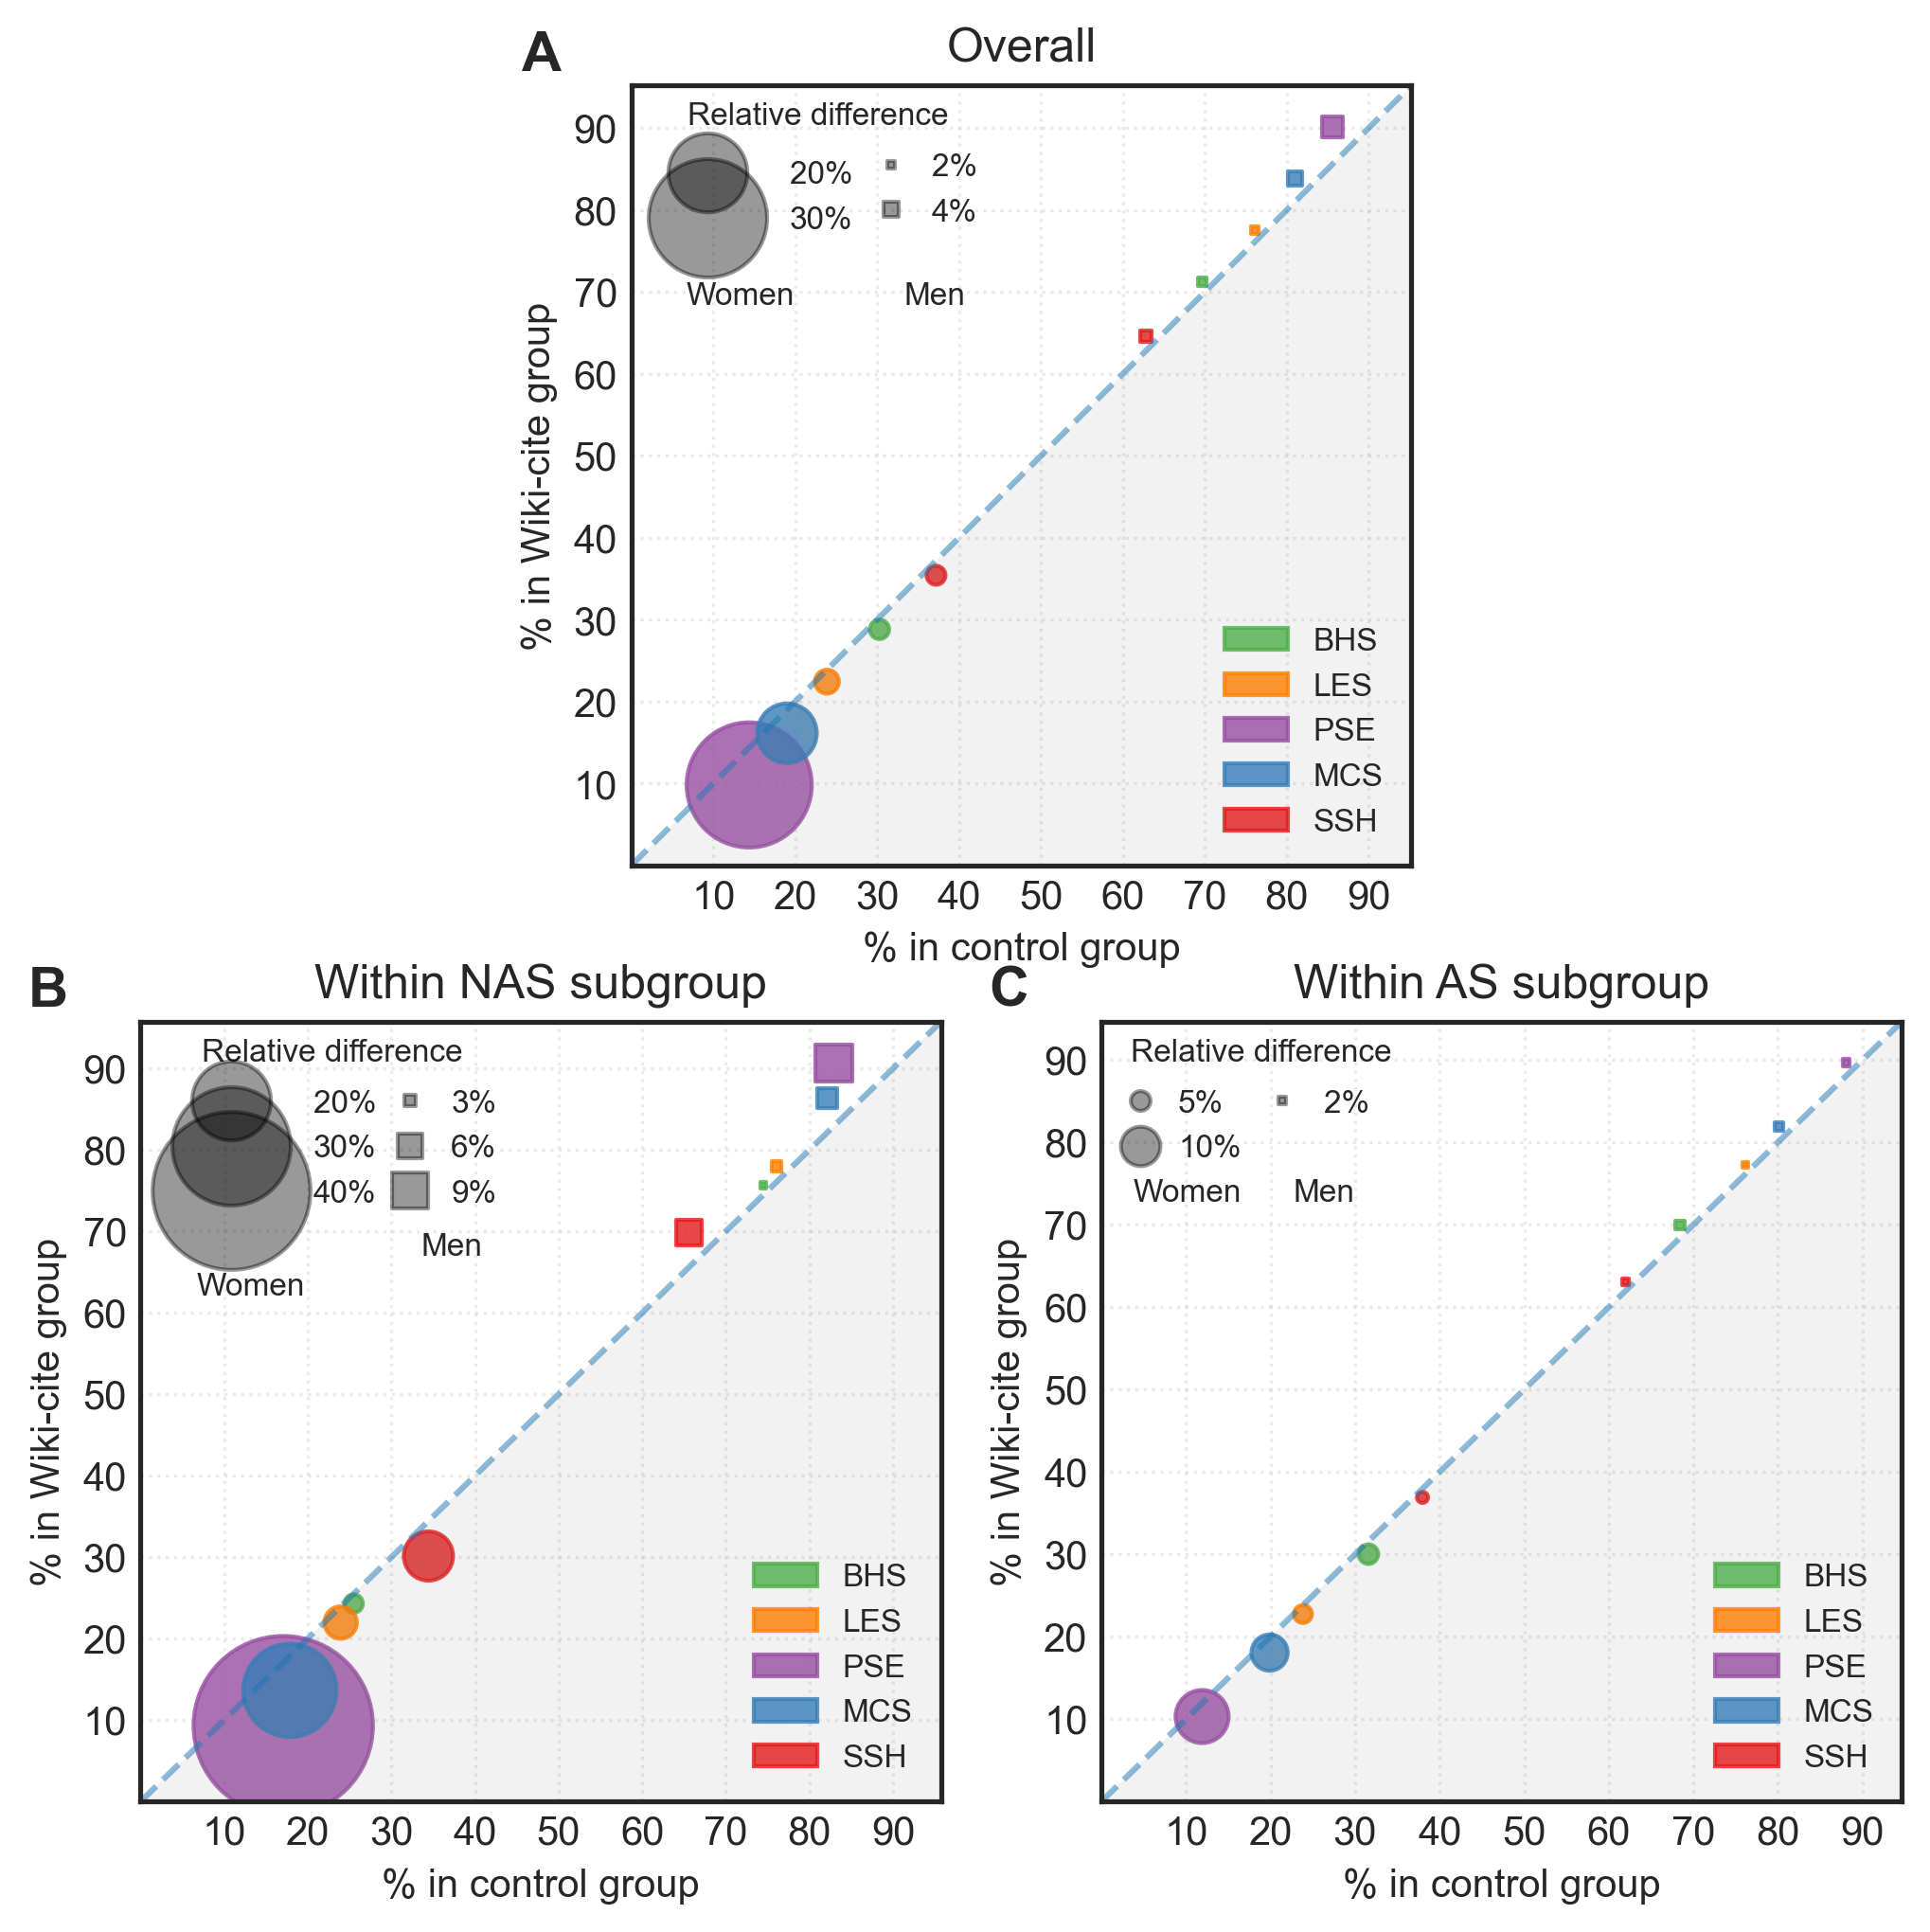

In [19]:
# merge figures

def gen_single_gs(figsize=(8,4)):
    fig = plt.figure(constrained_layout=True, figsize=figsize,dpi=300)
    gs0 = GridSpec(2, 2,wspace=0.2, hspace=0.2, width_ratios=[1,1], height_ratios=[1,1])

    ax0 = plt.subplot(gs0[0,:])
    ax10 = plt.subplot(gs0[1,0])
    ax11 = plt.subplot(gs0[1,1])
    return fig, ax0, ax10, ax11

fig, ax0, ax10, ax11 = gen_single_gs(figsize=(8,8))

markers = {"Female":"o","Male":"s"}
xlabels = ["Women","Men"]
#x_full = ["Non-Anglo","Anglo","All"]

t1 = single_gender(1)
t2 = single_gender(0)

single_scatter(ax0,
              t1, # correspond to marker[0]
              t2, # correspond to marker[1]
              title="Overall",
              main_topic="All",
              markers=markers,
              xlabels=xlabels,
              step = 10,
              leg2pos=[0.32,0.94],
              leg2handletextpad=1.6,
              leg2num = [20,30,40],
              leg3pos=[0.48,0.95],
              leg3handletextpad=0.3,
               leg3num = 3,
              leg2textpos=[0.07,0.72],
              leg3textpos=[0.35,0.72],
              legtitlepos=[0.24,0.95])

single_scatter(ax10,
              t1, # correspond to marker[0]
              t2, # correspond to marker[1]
              title="Within NAS subgroup",
              main_topic="Non-Anglo",
              markers=markers,
              xlabels=xlabels,
              step = 10,
              leg2pos=[0.33,0.95],
              leg2handletextpad=1.6,
              leg2num = [20,30,40],
              leg3pos=[0.48,0.95],
              leg3handletextpad=0.3,
               leg3num = 3,
              leg2textpos=[0.07,0.65],
              leg3textpos=[0.35,0.70],
              legtitlepos=[0.24,0.95])

single_scatter(ax11,
              t1, # correspond to marker[0]
              t2, # correspond to marker[1]
              title="Within AS subgroup",
              main_topic="Anglo",
              markers=markers,
              xlabels=xlabels,
              step = 10,
              leg2pos=[0.21,0.95],
              leg2handletextpad=0.2,
              leg2num = 3,
              leg3pos=[0.37,0.95],
              leg3handletextpad=0.3,
               leg3num = [2,3],
              leg2textpos=[0.04,0.77],
              leg3textpos=[0.24,0.77],
              legtitlepos=[0.20,0.95])

ax0.set_aspect('equal')

# Add panel label
label_param = {"x":-0.14,
              "y": 1.02,
              "fontsize": 14,
              }
ax0.text(s="A", transform=ax0.transAxes, fontweight="bold", **label_param)
ax10.text(s="B", transform=ax10.transAxes, fontweight="bold", **label_param)
ax11.text(s="C",transform=ax11.transAxes, fontweight="bold", **label_param)

fig.savefig(r"single_gender.pdf", dpi=300, bbox_inches='tight')

In [20]:
# match by gender to see country diff
df_single["bin_sig2"] = df_single.apply(lambda x:"-".join([x["stratum_id"],str(x["author_1_gender"])]),axis=1)
strata_num = pd.pivot_table(df_single,values="id",index="bin_sig2",columns="is_wiki_cited",aggfunc=lambda x: len(x.unique()))
strata_num

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/3422991359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single["bin_sig2"] = df_single.apply(lambda x:"-".join([x["stratum_id"],str(x["author_1_gender"])]),axis=1)


is_wiki_cited,0,1
bin_sig2,,
1-816-2-1-0-0,2.0,NaN
1-816-2-1-0-1,1.0,NaN
10001-346-1-1-0-0,3.0,1.0
10003-1155-4-1-0-0,1.0,1.0
10003-148-1-1-0-0,2.0,1.0
...,...,...
9993-572-2-1-0-0,1.0,NaN
9993-572-2-1-0-1,NaN,1.0
9993-756-2-1-0-0,4.0,1.0


In [21]:
strata_num_dropna = strata_num.dropna()
sum1 = strata_num_dropna[1].sum()
sum0 = strata_num_dropna[0].sum()

In [22]:
# add weights

strata_num_dropna["w"] = (strata_num_dropna[1]/sum1)/(strata_num_dropna[0]/sum0)
strata_num_dropna["w2"] = 1
strata_num_dropna

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/485156338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_num_dropna["w"] = (strata_num_dropna[1]/sum1)/(strata_num_dropna[0]/sum0)
C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/485156338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_num_dropna["w2"] = 1


is_wiki_cited,0,1,w,w2
bin_sig2,,,,
10001-346-1-1-0-0,3.0,1.0,2.016185,1
10003-1155-4-1-0-0,1.0,1.0,6.048554,1
10003-148-1-1-0-0,2.0,1.0,3.024277,1
10004-322-2-1-0-0,1.0,1.0,6.048554,1
10005-916-1-1-0-0,1.0,1.0,6.048554,1
...,...,...,...,...
9993-2938-1-1-0-0,4.0,1.0,1.512138,1
9993-2938-3-1-0-0,6.0,1.0,1.008092,1
9993-3054-2-1-0-0,3.0,1.0,2.016185,1


In [23]:
a1 = pd.merge(df_single[df_single["is_wiki_cited"]==0],strata_num_dropna["w"],how="inner",left_on="bin_sig2",right_index=True)
a2 = pd.merge(df_single[df_single["is_wiki_cited"]==1],strata_num_dropna["w2"],how="inner",left_on="bin_sig2",right_index=True)
a2.rename(columns={"w2": "w"},inplace=True)
df_single_new = pd.concat([a1,a2],axis=0,ignore_index=True)
df_single_new

,id,is_wiki_cited,stratum_id,PubYear,Code_Venue,leiden_field,Nb_Author,is_oa,author_1_gender,author_1_ctry,...,2014,2015,2016,2017,2018,2019,2020,bin_sig,bin_sig2,w
0,10,0,7733-898-1-1-0,2006,7733,898,1,0,1,United States,...,0,0,0,0,0,0,0,7733-898-1-1-0-1,7733-898-1-1-0-1,1.209711
1,3186,0,7733-898-1-1-0,2006,7733,898,1,0,1,United States,...,0,0,0,0,0,0,0,7733-898-1-1-0-1,7733-898-1-1-0-1,1.209711
2,8441,0,7733-898-1-1-0,2006,7733,898,1,0,1,United States,...,0,0,0,0,0,0,0,7733-898-1-1-0-1,7733-898-1-1-0-1,1.209711
3,36210,0,7733-898-1-1-0,2006,7733,898,1,0,1,United States,...,0,0,0,0,0,0,0,7733-898-1-1-0-1,7733-898-1-1-0-1,1.209711
4,41586,0,7733-898-1-1-0,2007,7733,898,1,0,1,United Kingdom,...,0,0,0,0,0,0,0,7733-898-1-1-0-1,7733-898-1-1-0-1,1.209711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131810,2098743,1,10282-756-2-1-0,2009,10282,756,1,0,1,United States,...,0,0,0,0,0,0,0,10282-756-2-1-0-1,10282-756-2-1-0-1,1.000000
131811,2098760,1,894-2319-4-1-0,2019,894,2319,1,0,0,Netherlands,...,0,0,0,0,0,1,0,894-2319-4-1-0-0,894-2319-4-1-0-0,1.000000
131812,2098891,1,19740-2065-3-1-0,2016,19740,2065,1,0,0,United Kingdom,...,0,0,1,0,0,0,0,19740-2065-3-1-0-1,19740-2065-3-1-0-0,1.000000
131813,2098934,1,2410-1668-2-1-0,2012,2410,1668,1,0,1,United States,...,0,0,0,0,0,0,0,2410-1668-2-1-0-1,2410-1668-2-1-0-1,1.000000


In [24]:
# by gender # by continent

sphere = {0:"Non-Anglo",1:"Anglo"} # whether from five eyes
genders = {0:"Male",1:"Female"} # 1 male 2 female
groups = {1:"Cited",0:"Uncited"}
#quartiles = ["Q1","Q2","Q3","Q4","unranked"]

def single_ctry(g): #0:"Non-Anglo",1:"Anglo"
    t = pd.DataFrame(index=fields+["All fields"],
                     columns=pd.MultiIndex.from_product([list(genders.values())+["All"], list(groups.values())+["Relative difference"]]))

    for w in [0,1]: #is_wiki_cited
        for f in fields:
            for c in genders.keys():
                subdf = df_single_new[(df_single_new["is_wiki_cited"]==w)
                                      & (df_single_new[f]==1)
                                      & (df_single_new["author_1_gender"]==c)]
                a = subdf.loc[(subdf["author_1_sphere"]==g),"w"].sum()/subdf["w"].sum()
                b = len(subdf)
                print(w,f,c,b)
                t.loc[f,(genders[c],groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        for f in fields:
            subdf = df_single_new[(df_single_new["is_wiki_cited"]==w)
                                  & (df_single_new[f]==1)]
            a = subdf.loc[(subdf["author_1_sphere"]==g),"w"].sum()/subdf["w"].sum()
            t.loc[f,("All",groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        for c in genders:
            subdf = df_single_new[(df_single_new["is_wiki_cited"]==w)
                                  & (df_single_new["author_1_gender"]==c)]
            a = subdf.loc[(subdf["author_1_sphere"]==g),"w"].sum()/subdf["w"].sum()
            t.loc["All fields",(genders[c],groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        subdf = df_single_new[(df_single_new["is_wiki_cited"]==w)]
        a = subdf.loc[(subdf["author_1_sphere"]==g),"w"].sum()/subdf["w"].sum()
        t.loc["All fields",("All",groups[w])] = a

    for s in ["Male","Female","All"]:
        t.loc[:,(s,"Relative difference")] = (t.loc[:,(s,"Cited")] - t.loc[:,(s,"Uncited")])/ t.loc[:,(s,"Uncited")]
      
    return t.applymap(lambda x: x*100)

single_ctry(0)

0 BHS 0 8103
0 BHS 1 2026
0 LES 0 9433
0 LES 1 1553
0 PSE 0 12438
0 PSE 1 686
0 MCS 0 7539
0 MCS 1 784
0 SSH 0 59690
0 SSH 1 22178
1 BHS 0 2725
1 BHS 1 783
1 LES 0 3055
1 LES 1 632
1 PSE 0 1719
1 PSE 1 119
1 MCS 0 1094
1 MCS 1 146
1 SSH 0 7391
1 SSH 1 3744


Male                                    Female             \
                Cited    Uncited Relative difference      Cited    Uncited   
BHS         26.642202  31.276259          -14.816534  19.923372  22.893930   
LES         42.193126  46.485703           -9.234188  41.772152  46.079634   
PSE         46.189645  54.796734          -15.707302  46.218487  55.127142   
MCS         44.241316  53.428515          -17.195310  39.041096  43.100273   
SSH         26.248140  29.173500          -10.027459  21.260684  24.391411   
All fields  32.619013  37.097185          -12.071460  24.254432  27.629171   

                                      All                                 
           Relative difference      Cited    Uncited Relative difference  
BHS                 -12.975309  25.142531  29.405289          -14.496568  
LES                  -9.347910  42.120966  46.416098           -9.253540  
PSE                 -16.160197  46.191513  54.818126          -15.736790  
MCS                  -9.417985  43.629032  52.212448          -16.439404  
SSH                 -12.835366  24.571172  27.565584          -10.862866  
All fields          -12.214405  30.474306  34.669554          -12.100669

In [25]:
si_t2 = single_si_tab(df=df_single_new,
            first_col= {0:"NAS",1:"AS"},
            first_property = "author_1_sphere",
            second_col={"[1]":"Female","[0]":"Male","[0,1]":"All"},
            second_property = "author_1_gender",
            col_name = ["Country","Gender","Weighted"],
            )

si_t2

Country                  NAS                                           AS  \
Gender                Female           Male            All         Female   
Weighted                   #     %        #     %        #     %        #   
BHS        Wiki-cite   156.0  19.9    726.0  26.6    882.0  25.1    627.0   
           Control    1084.3  22.9   5155.0  31.3   6239.3  29.4   3651.8   
           rd            NaN -13.0      NaN -14.8      NaN -14.5      NaN   
LES        Wiki-cite   264.0  41.8   1289.0  42.2   1553.0  42.1    368.0   
           Control    1761.5  46.1   8589.8  46.5  10351.3  46.4   2061.2   
           rd            NaN  -9.3      NaN  -9.2      NaN  -9.3      NaN   
PSE        Wiki-cite    55.0  46.2    794.0  46.2    849.0  46.2     64.0   
           Control     396.8  55.1   5697.5  54.8   6094.3  54.8    323.0   
           rd            NaN -16.2      NaN -15.7      NaN -15.7      NaN   
MCS        Wiki-cite    57.0  39.0    484.0  44.2    541.0  43.6     89.0   
           Control     380.6  43.1   3535.4  53.4   3916.0  52.2    502.5   
           rd            NaN  -9.4      NaN -17.2      NaN -16.4      NaN   
SSH        Wiki-cite   796.0  21.3   1940.0  26.2   2736.0  24.6   2948.0   
           Control    5523.6  24.4  13042.0  29.2  18565.6  27.6  17122.2   
           rd            NaN -12.8      NaN -10.0      NaN -10.9      NaN   
All fields Wiki-cite  1163.0  24.3   4536.0  32.6   5699.0  30.5   3632.0   
           Control    8013.2  27.6  31202.9  37.1  39216.1  34.7  20989.6   
           rd            NaN -12.2      NaN -12.1      NaN -12.1      NaN   

Country                                                   
Gender                         Male            All        
Weighted                 %        #     %        #     %  
BHS        Wiki-cite  80.1   1999.0  73.4   2626.0  74.9  
           Control    77.1  11327.3  68.7  14979.0  70.6  
           rd          3.9      NaN   6.7      NaN   6.0  
LES        Wiki-cite  58.2   1766.0  57.8   2134.0  57.9  
           Control    53.9   9888.5  53.5  11949.8  53.6  
           rd          8.0      NaN   8.0      NaN   8.0  
PSE        Wiki-cite  53.8    925.0  53.8    989.0  53.8  
           Control    44.9   4700.0  45.2   5023.0  45.2  
           rd         19.9      NaN  19.0      NaN  19.1  
MCS        Wiki-cite  61.0    610.0  55.8    699.0  56.4  
           Control    56.9   3081.7  46.6   3584.2  47.8  
           rd          7.1      NaN  19.7      NaN  18.0  
SSH        Wiki-cite  78.7   5451.0  73.8   8399.0  75.4  
           Control    75.6  31662.9  70.8  48785.0  72.4  
           rd          4.1      NaN   4.1      NaN   4.1  
All fields Wiki-cite  75.7   9370.0  67.4  13002.0  69.5  
           Control    72.4  52908.3  62.9  73897.9  65.3  
           rd          4.7      NaN   7.1      NaN   6.4

0 BHS 0 8103
0 BHS 1 2026
0 LES 0 9433
0 LES 1 1553
0 PSE 0 12438
0 PSE 1 686
0 MCS 0 7539
0 MCS 1 784
0 SSH 0 59690
0 SSH 1 22178
1 BHS 0 2725
1 BHS 1 783
1 LES 0 3055
1 LES 1 632
1 PSE 0 1719
1 PSE 1 119
1 MCS 0 1094
1 MCS 1 146
1 SSH 0 7391
1 SSH 1 3744
0 BHS 0 8103
0 BHS 1 2026
0 LES 0 9433
0 LES 1 1553
0 PSE 0 12438
0 PSE 1 686
0 MCS 0 7539
0 MCS 1 784
0 SSH 0 59690
0 SSH 1 22178
1 BHS 0 2725
1 BHS 1 783
1 LES 0 3055
1 LES 1 632
1 PSE 0 1719
1 PSE 1 119
1 MCS 0 1094
1 MCS 1 146
1 SSH 0 7391
1 SSH 1 3744


C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/534238510.py:67: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig(r"single_ctry.pdf", dpi=300, bbox_inches='tight')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


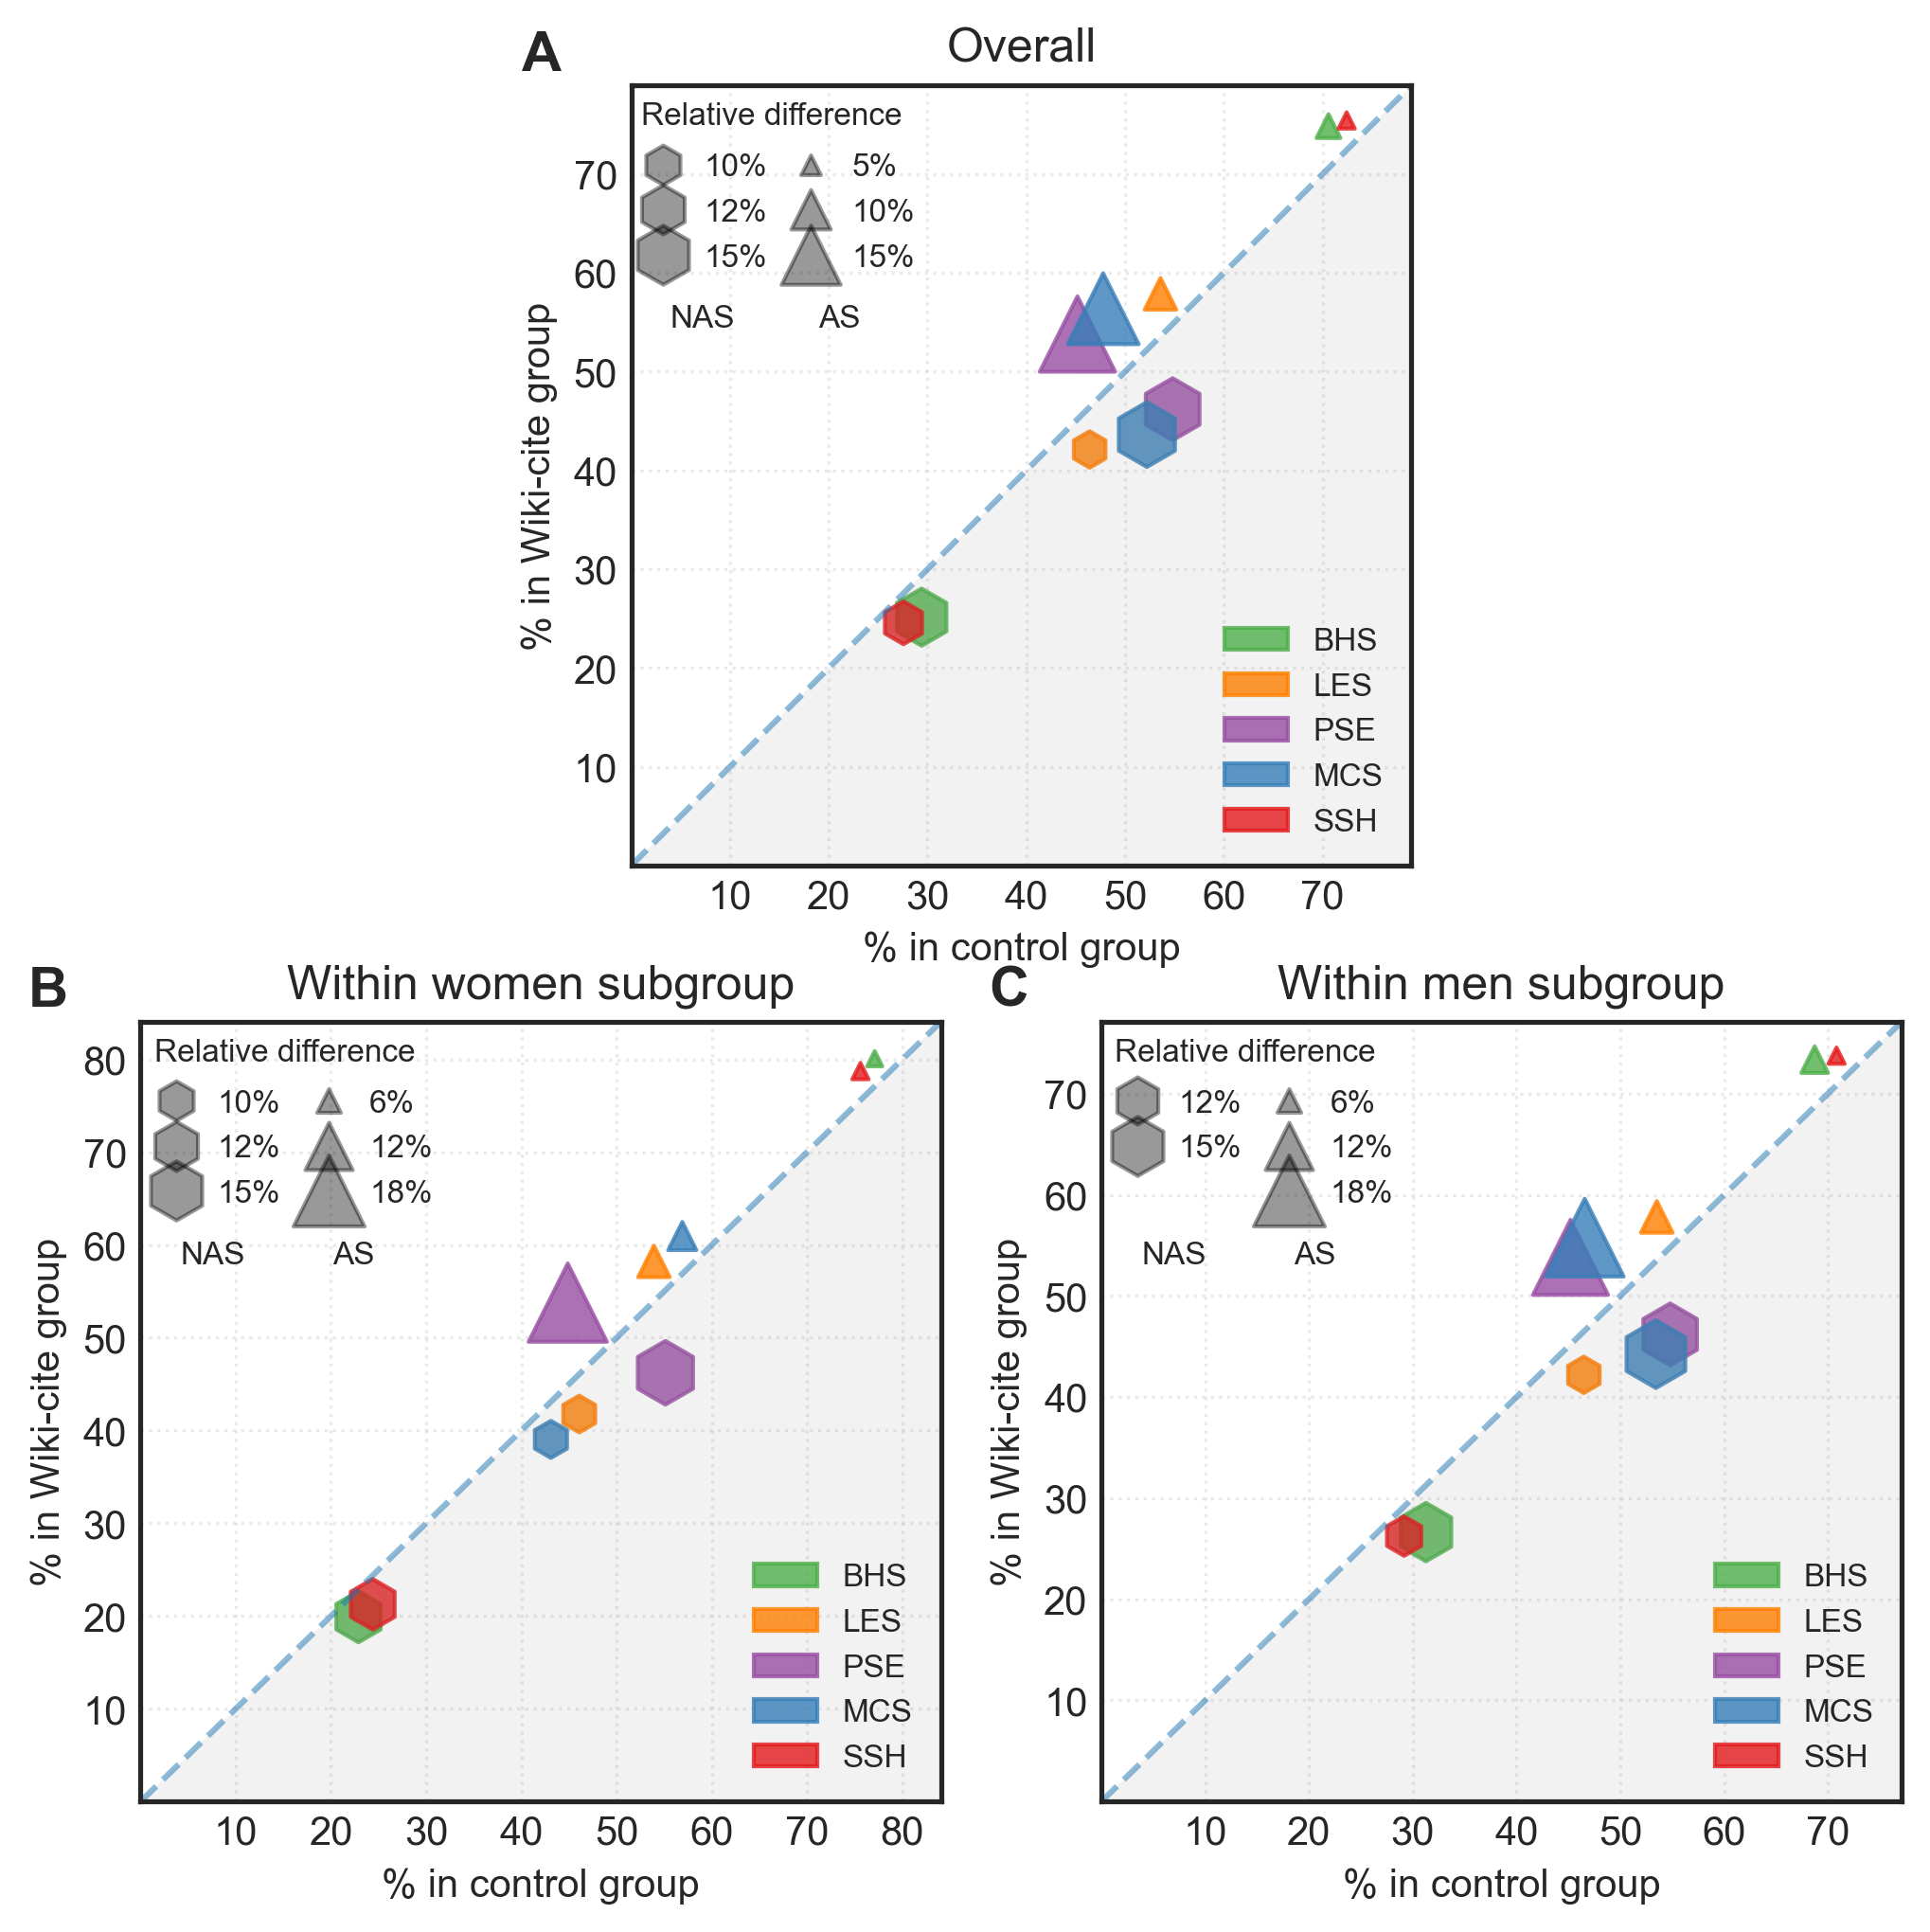

In [26]:
# merge figures

fig, ax0, ax10, ax11 = gen_single_gs(figsize=(8,8))

markers = {"Non-Anglo":"h","Anglo":"^"}
xlabels = ["NAS","AS"]

t1=single_ctry(0)
t2=single_ctry(1)

single_scatter(ax0, t1, t2,
               title = "Overall",
              main_topic="All",
              markers=markers,
              xlabels=xlabels,
               step = 10,
               leg2num=3,
              leg2pos=[0.21,0.95],
              leg2handletextpad=0.3,
              leg3pos=[0.40,0.95],
              leg3handletextpad=0.3,
              leg2textpos=[0.05,0.69],
              leg3textpos=[0.24,0.69],
              legtitlepos=[0.18,0.95])

single_scatter(ax10, t1, t2,
                title = "Within women subgroup",
              main_topic="Female",
              markers=markers,
              xlabels=xlabels,
               step = 10,
               leg2num=3,
              leg2pos=[0.21,0.95],
              leg2handletextpad=0.3,
              leg3pos=[0.40,0.95],
              leg3handletextpad=0.3,
              leg2textpos=[0.05,0.69],
              leg3textpos=[0.24,0.69],
              legtitlepos=[0.18,0.95])

single_scatter(ax11, t1, t2,
              title = "Within men subgroup",
              main_topic="Male",
              markers=markers,
              xlabels=xlabels,
               step = 10,
               leg2num=3,
              leg2pos=[0.21,0.95],
              leg2handletextpad=0.3,
              leg3pos=[0.40,0.95],
              leg3handletextpad=0.3,
              leg2textpos=[0.05,0.69],
              leg3textpos=[0.24,0.69],
              legtitlepos=[0.18,0.95])

ax0.set_aspect('equal')

# Add panel label
label_param = {"x":-0.14,
              "y": 1.02,
              "fontsize": 14,
              }
ax0.text(s="A", transform=ax0.transAxes, fontweight="bold", **label_param)
ax10.text(s="B", transform=ax10.transAxes, fontweight="bold", **label_param)
ax11.text(s="C",transform=ax11.transAxes, fontweight="bold", **label_param)

fig.savefig(r"single_ctry.pdf", dpi=300, bbox_inches='tight')

# multi author

In [27]:
df_multi["male_male"] = 0
df_multi.loc[(df_multi["author_1_gender"] == 0) & (df_multi["author_last_gender"] == 0), "male_male"] = 1
df_multi["female_female"] = 0
df_multi.loc[(df_multi["author_1_gender"] == 1) & (df_multi["author_last_gender"] == 1), "female_female"] = 1
df_multi["mix_gender"] = 0
df_multi.loc[((df_multi["author_1_gender"] == 0) & (df_multi["author_last_gender"] == 1)) | 
             ((df_multi["author_1_gender"] == 1) & (df_multi["author_last_gender"] == 0)), "mix_gender"] = 1

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/8633601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi["male_male"] = 0
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/8633601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [28]:
df_multi["other_other"] = 0
df_multi.loc[(df_multi["author_1_sphere"] == 0) & (df_multi["author_last_sphere"] == 0), "other_other"] = 1
df_multi["anglo_anglo"] = 0
df_multi.loc[(df_multi["author_1_sphere"] == 1) & (df_multi["author_last_sphere"] == 1), "anglo_anglo"] = 1
df_multi["mix_ctry"] = 0
df_multi.loc[(df_multi["author_1_sphere"] == 0) & (df_multi["author_last_sphere"] == 1) |
             (df_multi["author_1_sphere"] == 1) & (df_multi["author_last_sphere"] == 0), "mix_ctry"] = 1

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/3234961856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi["other_other"] = 0
C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/3234961856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi["anglo_anglo"] = 0
C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/3234961856.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [29]:
# match by gender 

df_multi["bin_sig"] = df_multi.apply(lambda x:"-".join([x["stratum_id"],str(int(x["author_1_sphere"]+x["author_last_sphere"]))]),axis=1)
strata_num = pd.pivot_table(df_multi,values="id",index="bin_sig",columns="is_wiki_cited",aggfunc=lambda x: len(x.unique()))
strata_num

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/4145866551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi["bin_sig"] = df_multi.apply(lambda x:"-".join([x["stratum_id"],str(int(x["author_1_sphere"]+x["author_last_sphere"]))]),axis=1)


is_wiki_cited,0,1
bin_sig,,
1-816-1-2-0-0,2.0,NaN
1-816-1-2-0-1,2.0,1.0
1-816-1-2-0-2,NaN,1.0
1000-1605-4-2-0-0,1.0,1.0
1000-286-1-2-1-0,2.0,NaN
...,...,...
9999-224-2-3-0-2,7.0,1.0
9999-270-2-2-0-2,NaN,1.0
9999-29-2-3-0-2,1.0,1.0


In [30]:
strata_num_dropna = strata_num.dropna()
sum1 = strata_num_dropna[1].sum()
sum0 = strata_num_dropna[0].sum()

In [31]:
# add weights

strata_num_dropna["w"] = (strata_num_dropna[1]/sum1)/(strata_num_dropna[0]/sum0)
strata_num_dropna["w2"] = 1
a1 = pd.merge(df_multi[df_multi["is_wiki_cited"]==0],strata_num_dropna["w"],how="inner",left_on="bin_sig",right_index=True)
a2 = pd.merge(df_multi[df_multi["is_wiki_cited"]==1],strata_num_dropna["w2"],how="inner",left_on="bin_sig",right_index=True)
a2.rename(columns={"w2": "w"},inplace=True)
df_multi_new = pd.concat([a1,a2],axis=0,ignore_index=True)
df_multi_new

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/3160238214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_num_dropna["w"] = (strata_num_dropna[1]/sum1)/(strata_num_dropna[0]/sum0)
C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/3160238214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_num_dropna["w2"] = 1


,id,is_wiki_cited,stratum_id,PubYear,Code_Venue,leiden_field,Nb_Author,is_oa,author_1_gender,author_1_ctry,...,2019,2020,male_male,female_female,mix_gender,other_other,anglo_anglo,mix_ctry,bin_sig,w
0,1,0,1402-1916-1-3-0,2006,1402,1916,7,0,0,Switzerland,...,0,0,1,0,0,1,0,0,1402-1916-1-3-0-0,0.39534
1,56,0,1402-1916-1-3-0,2006,1402,1916,7,0,1,Switzerland,...,0,0,0,1,0,1,0,0,1402-1916-1-3-0-0,0.39534
2,6879,0,1402-1916-1-3-0,2006,1402,1916,6,0,0,Switzerland,...,0,0,0,0,1,1,0,0,1402-1916-1-3-0-0,0.39534
3,9748,0,1402-1916-1-3-0,2006,1402,1916,7,0,0,China,...,0,0,1,0,0,1,0,0,1402-1916-1-3-0-0,0.39534
4,44725,0,1402-1916-1-3-0,2007,1402,1916,7,0,0,Austria,...,0,0,1,0,0,1,0,0,1402-1916-1-3-0-0,0.39534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120094,2098823,1,1441-69-2-2-0,2012,1441,69,3,0,1,South Korea,...,0,0,0,0,1,1,0,0,1441-69-2-2-0-0,1.00000
1120095,2098918,1,1413-464-4-2-0,2018,1413,464,4,0,1,Iran,...,0,0,0,0,1,1,0,0,1413-464-4-2-0-0,1.00000
1120096,2098925,1,8200-66-1-2-0,2006,8200,66,2,0,0,Denmark,...,0,0,1,0,0,1,0,0,8200-66-1-2-0-0,1.00000
1120097,2098938,1,3200-3355-2-3-0,2009,3200,3355,6,0,0,United States,...,0,0,1,0,0,0,1,0,3200-3355-2-3-0-2,1.00000


In [32]:
# by field
sphere = {0:"other_other",1:"anglo_anglo",2:"mix_ctry"} # whether from five eyes
genders = {0:"female_female",1:"male_male",2:"mix_gender"} # 1 male 2 female
groups = {1:"Cited",0:"Uncited"}

def multi_gender(g):
    t = pd.DataFrame(index=fields+["All fields"],
                     columns=pd.MultiIndex.from_product([list(sphere.values())+["All"], list(groups.values())+["Relative difference"]]))

    for w in [0,1]: #is_wiki_cited
        for f in fields:
            for c in sphere.values():
                subdf = df_multi_new[(df_multi_new["is_wiki_cited"]==w)
                                      & (df_multi_new[f]==1)
                                      & (df_multi_new[c]==1)]
                a = subdf.loc[(subdf[g]==1),"w"].sum()/subdf["w"].sum()
                b = len(subdf)
                print(w,f,c,b)
                t.loc[f,(c,groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        for f in fields:
            subdf = df_multi_new[(df_multi_new["is_wiki_cited"]==w)
                                  & (df_multi_new[f]==1)]
            a = subdf.loc[(subdf[g]==1),"w"].sum()/subdf["w"].sum()
            t.loc[f,("All",groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        for c in sphere.values():
            subdf = df_multi_new[(df_multi_new["is_wiki_cited"]==w)
                                  & (df_multi_new[c]==1)]
            a = subdf.loc[(subdf[g]==1),"w"].sum()/subdf["w"].sum()
            t.loc["All fields",(c,groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        subdf = df_multi_new[(df_multi_new["is_wiki_cited"]==w)]
        a = subdf.loc[(subdf[g]==1),"w"].sum()/subdf["w"].sum()
        t.loc["All fields",("All",groups[w])] = a

    for s in list(sphere.values())+["All"]:
        t.loc[:,(s,"Relative difference")] = (t.loc[:,(s,"Cited")] - t.loc[:,(s,"Uncited")])/ t.loc[:,(s,"Uncited")]

    return t.applymap(lambda x: x*100)

multi_gender("male_male")

0 BHS other_other 183202
0 BHS anglo_anglo 237600
0 BHS mix_ctry 3210
0 LES other_other 165420
0 LES anglo_anglo 107087
0 LES mix_ctry 5804
0 PSE other_other 188557
0 PSE anglo_anglo 86151
0 PSE mix_ctry 4852
0 MCS other_other 34317
0 MCS anglo_anglo 18208
0 MCS mix_ctry 1262
0 SSH other_other 42188
0 SSH anglo_anglo 98005
0 SSH mix_ctry 3679
1 BHS other_other 31452
1 BHS anglo_anglo 44078
1 BHS mix_ctry 1500
1 LES other_other 26585
1 LES anglo_anglo 21280
1 LES mix_ctry 2406
1 PSE other_other 11911
1 PSE anglo_anglo 10621
1 PSE mix_ctry 1039
1 MCS other_other 2934
1 MCS anglo_anglo 2766
1 MCS mix_ctry 390
1 SSH other_other 4998
1 SSH anglo_anglo 13438
1 SSH mix_ctry 1065


other_other                                anglo_anglo             \
                 Cited    Uncited Relative difference       Cited    Uncited   
BHS          44.133918  41.327146            6.791594   45.934480  43.718585   
LES          46.744405  44.388656            5.307097   50.982143  49.198660   
PSE          60.095710  55.548255            8.186495   63.854628  63.323547   
MCS          67.995910  60.737323           11.950785   67.064353  63.536193   
SSH          43.297319  40.932774            5.776655   37.773478  35.941986   
All fields   48.663587  45.599875            6.718685   49.022402  47.167856   

                                 mix_ctry                                 \
           Relative difference      Cited    Uncited Relative difference   
BHS                   5.068543  57.333333  51.341813           11.669865   
LES                   3.625065  59.351621  55.951539            6.076833   
PSE                   0.838678  65.736285  67.249011           -2.249441   
MCS                   5.552993  71.282051  71.083103            0.279881   
SSH                   5.095691  50.046948  46.695847            7.176445   
All fields            3.931801  59.504896  56.539899            5.244079   

                  All                                 
                Cited    Uncited Relative difference  
BHS         45.421264  42.890587            5.900310  
LES         49.141652  46.978164            4.605306  
PSE         62.038098  59.567535            4.147498  
MCS         67.783251  62.671071            8.157160  
SSH         39.859494  37.808394            5.424988  
All fields  49.255563  46.827288            5.185597

In [33]:
# make a supplementary table

def multi_si_tab(df=df_multi_new,
                  first_col= {"female_female":"Women","male_male":"Men","mix_gender":"Mix-gender"},
                  second_col={"other_other":"NAS","anglo_anglo":"AS","mix_ctry":"Mix-sphere","All_ctry":"All"},
                  col_name = ["Gender","Country","Weighted"],
                 ):
    df["All_ctry"] = 1
    df["All fields"] = 1
    third_col = ["#","%"]
    first_row = fields+["All fields"]
    second_row = ["Wiki-cite","Control","rd"]
    second_row_map = {1:"Wiki-cite",0:"Control"}

    tab_index = pd.MultiIndex.from_product([first_row, second_row])
    tab_col = pd.MultiIndex.from_product([first_col.values(),second_col.values(),third_col], names=col_name)

    t = pd.DataFrame(index=tab_index, columns=tab_col)

    for w in second_row_map.keys(): #is_wiki_cited
        for f in first_row:
            for g in first_col.keys():
                for c in second_col.keys():
                    subdf = df[(df["is_wiki_cited"]==w)
                                   & (df[f]==1)
                                   & (df[c]==1)]
                    num = subdf.loc[(subdf[g]==1),"w"].sum()
                    perc = num / subdf["w"].sum() * 100
                    t.loc[(f, second_row_map[w]),(first_col[g], second_col[c], "#")] = num
                    t.loc[(f, second_row_map[w]),(first_col[g], second_col[c], "%")] = perc

    for f in first_row:
        for g in first_col.keys():
            for c in second_col.keys():
                p_wiki = t.loc[(f, "Wiki-cite"),(first_col[g], second_col[c], "%")]
                p_ctrl = t.loc[(f, "Control"),(first_col[g], second_col[c], "%")]
                rd = (p_wiki - p_ctrl) / p_ctrl * 100
                t.loc[(f, "rd"),(first_col[g], second_col[c], "%")] = rd

    return t.applymap(lambda x: round(x,1) if x != np.nan else x)

si_t3 = multi_si_tab()

si_t3

Gender                  Women                                                  \
Country                   NAS             AS       Mix-sphere             All   
Weighted                    #     %        #     %          #     %         #   
BHS        Wiki-cite   4231.0  13.5   6153.0  14.0      134.0   8.9   10518.0   
           Control    31493.2  14.9  44154.5  14.9     1017.4  10.1   76665.2   
           rd             NaN  -9.7      NaN  -6.3        NaN -11.5       NaN   
LES        Wiki-cite   3215.0  12.1   2071.0   9.7      153.0   6.4    5439.0   
           Control    23505.8  13.2  14421.5  10.1     1044.1   6.5   38971.3   
           rd             NaN  -8.1      NaN  -3.5        NaN  -1.5       NaN   
PSE        Wiki-cite    772.0   6.5    537.0   5.1       40.0   3.8    1349.0   
           Control     6274.1   7.8   3449.8   4.8      289.8   4.1   10013.7   
           rd             NaN -17.3      NaN   4.6        NaN  -7.2       NaN   
MCS        Wiki-cite    115.0   3.9    175.0   6.3       10.0   2.6     300.0   
           Control     1219.7   6.2   1095.4   5.9       80.0   3.1    2395.1   
           rd             NaN -36.6      NaN   7.4        NaN -16.0       NaN   
SSH        Wiki-cite    744.0  14.9   2889.0  21.5      131.0  12.3    3764.0   
           Control     5601.5  16.7  20272.6  22.4      938.6  13.1   26812.7   
           rd             NaN -10.7      NaN  -4.2        NaN  -6.2       NaN   
All fields Wiki-cite   7310.0  11.4   9456.0  12.5      392.0   7.2   17158.0   
           Control    54970.4  12.8  67015.4  13.2     2812.3   7.7  124798.2   
           rd             NaN -10.6      NaN  -5.2        NaN  -6.3       NaN   

Gender                           Men        ...                 Mix-gender  \
Country                          NAS        ...       All              NAS   
Weighted                 %         #     %  ...         #     %          #   
BHS        Wiki-cite  13.7   13881.0  44.1  ...   34988.0  45.4    13340.0   
           Control    14.8   87358.1  41.3  ...  222045.1  42.9    92530.5   
           rd         -7.8       NaN   6.8  ...       NaN   5.9        NaN   
LES        Wiki-cite  10.8   12427.0  46.7  ...   24704.0  49.1    10943.0   
           Control    11.5   79310.0  44.4  ...  158720.4  47.0    75856.0   
           rd         -6.2       NaN   5.3  ...       NaN   4.6        NaN   
PSE        Wiki-cite   5.7    7158.0  60.1  ...   14623.0  62.0     3981.0   
           Control     6.3   44467.0  55.5  ...   94364.1  59.6    29310.1   
           rd         -9.5       NaN   8.2  ...       NaN   4.1        NaN   
MCS        Wiki-cite   4.9    1995.0  68.0  ...    4128.0  67.8      824.0   
           Control     5.9   11976.6  60.7  ...   25651.0  62.7     6522.4   
           rd        -15.8       NaN  12.0  ...       NaN   8.2        NaN   
SSH        Wiki-cite  19.3    2164.0  43.3  ...    7773.0  39.9     2090.0   
           Control    20.5   13749.5  40.9  ...   49552.4  37.8    14239.4   
           rd         -5.7       NaN   5.8  ...       NaN   5.4        NaN   
All fields Wiki-cite  11.8   31079.0  48.7  ...   71458.0  49.3    25476.0   
           Control    12.8  195724.8  45.6  ...  456576.8  46.8   178527.0   
           rd         -7.6       NaN   6.7  ...       NaN   5.2        NaN   

Gender                                                                       
Country                           AS       Mix-sphere             All        
Weighted                 %         #     %          #     %         #     %  
BHS        Wiki-cite  42.4   17678.0  40.1      506.0  33.7   31524.0  40.9  
           Control    43.8  122572.6  41.4     3887.9  38.6  218991.0  42.3  
           rd         -3.1       NaN  -3.1        NaN -12.5       NaN  -3.3  
LES        Wiki-cite  41.2    8360.0  39.3      825.0  34.3   20128.0  40.0  
           Control    42.5   58233.6  40.7     6078.6  37.6  140168.3  41.5  
           rd         -3.0       Na

In [34]:
plt.style.use('seaborn-white')

def multi_scatter(ax,
                  t1,
                  t2,
                  t3,
                  title,
                  main_topic,
                  markers,
                  xlabels,
                  step = 10,
                  leg1pos="lower right",
                  leg2pos=[0.25,0.95],
                  leg2handletextpad=1,
                  leg2num=3,
                  leg3pos=[0.36,0.95],
                  leg3handletextpad=0.0,
                  leg3num=3,
                  leg4pos=[0.51,0.95],
                  leg4handletextpad=0.2,
                  leg4num=3,
                  leg2textpos=[0.02,0.69],
                  leg3textpos=[0.20,0.69],
                  leg4textpos=[0.34,0.68],
                  legtitlepos=[0.25,0.95]):
    x_full = list(markers.keys())
    #Green，orange，purple，blue，red
    colors = {"BHS":"#4DAF4A", "LES":"#FF7F00", "PSE":"#984EA3", "MCS":"#377EB8", "SSH":"#E41A1C"}
    fields = list(colors.keys())
    alpha = 0.8
    elements = []

    ts = [t1,t2,t3]
    
    for i in range(len(ts)):
        t = ts[i]
        y = t.loc[fields,(main_topic,"Cited")]
        x = t.loc[fields,(main_topic,"Uncited")]
        area = t.loc[fields,(main_topic,"Relative difference")]
        a = ax.scatter(x, y, s=area**2, marker=list(markers.values())[i], c=colors.values(), alpha=alpha)
        elements.append(a)

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xymax = max(xmax,ymax)+1
    ax.set_xlim([0,xymax])
    ax.set_ylim([0,xymax])

    xyticks = np.arange(step,xymax,step)
    ax.set_xticks(xyticks)
    ax.set_yticks(xyticks)

    ax.grid(ls=':', alpha=alpha/2)
    ax.plot([0, xymax], [0,xymax], alpha=0.5, ls='--', transform=ax.transAxes)
        
    x = np.arange(0, xymax,0.001)
    y1 = 0
    y2 = np.arange(0, xymax,0.001)
    ax.fill_between(x, y1, y2, alpha=0.1,facecolor='gray')
    
    ax.set_xlabel("% in control group")
    ax.set_ylabel("% in Wiki-cite group")
    ax.set_title(title)

    # legends

    handles1 = [mpatches.Patch(color=c, alpha=alpha) for c in colors.values()]
    legend1 = ax.legend(handles1,
                        colors.keys(),
                        loc=leg1pos,
                        fontsize=8)
    ax.add_artist(legend1)

    handles2, labels2 = elements[0].legend_elements("sizes", num=leg2num,fmt="{x:.0f}%", func=lambda s: np.sqrt(s))
    for handle in handles2:
        handle.set_alpha(alpha/2)
    legend2 = ax.legend(handles2,
                        labels2,
                        bbox_to_anchor=leg2pos,
                        fontsize=8,
                        handletextpad=leg2handletextpad)
    ax.add_artist(legend2)

    handles3, labels3 = elements[1].legend_elements("sizes", num=leg3num,fmt="{x:.0f}%", func=lambda s: np.sqrt(s))
    for handle in handles3:
        handle.set_alpha(alpha/2)
    legend3 = ax.legend(handles3,
                        labels3,
                        bbox_to_anchor=leg3pos,
                        fontsize=8,
                        handletextpad=leg3handletextpad)
    ax.add_artist(legend3)

    handles4, labels4 = elements[2].legend_elements("sizes", num=leg4num,fmt="{x:.0f}%", func=lambda s: np.sqrt(s))
    for handle in handles4:
        handle.set_alpha(alpha/2)
    legend4 = ax.legend(handles4,
                        labels4,
                        bbox_to_anchor=leg4pos,
                        fontsize=8,
                        handletextpad=leg4handletextpad)
    ax.add_artist(legend4)

    ax.text(*leg2textpos, xlabels[0], fontsize = 8, transform=ax.transAxes)
    ax.text(*leg3textpos, xlabels[1], fontsize = 8, transform=ax.transAxes)
    ax.text(*leg4textpos, xlabels[2], fontsize = 8, transform=ax.transAxes)
    ax.text(*legtitlepos, "Relative difference", ha="center", fontsize = 8, transform=ax.transAxes)

0 BHS other_other 183202
0 BHS anglo_anglo 237600
0 BHS mix_ctry 3210
0 LES other_other 165420
0 LES anglo_anglo 107087
0 LES mix_ctry 5804
0 PSE other_other 188557
0 PSE anglo_anglo 86151
0 PSE mix_ctry 4852
0 MCS other_other 34317
0 MCS anglo_anglo 18208
0 MCS mix_ctry 1262
0 SSH other_other 42188
0 SSH anglo_anglo 98005
0 SSH mix_ctry 3679
1 BHS other_other 31452
1 BHS anglo_anglo 44078
1 BHS mix_ctry 1500
1 LES other_other 26585
1 LES anglo_anglo 21280
1 LES mix_ctry 2406
1 PSE other_other 11911
1 PSE anglo_anglo 10621
1 PSE mix_ctry 1039
1 MCS other_other 2934
1 MCS anglo_anglo 2766
1 MCS mix_ctry 390
1 SSH other_other 4998
1 SSH anglo_anglo 13438
1 SSH mix_ctry 1065
0 BHS other_other 183202
0 BHS anglo_anglo 237600
0 BHS mix_ctry 3210
0 LES other_other 165420
0 LES anglo_anglo 107087
0 LES mix_ctry 5804
0 PSE other_other 188557
0 PSE anglo_anglo 86151
0 PSE mix_ctry 4852
0 MCS other_other 34317
0 MCS anglo_anglo 18208
0 MCS mix_ctry 1262
0 SSH other_other 42188
0 SSH anglo_anglo 

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/2285131505.py:106: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig(r"multi_gender.pdf", dpi=300, bbox_inches='tight')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


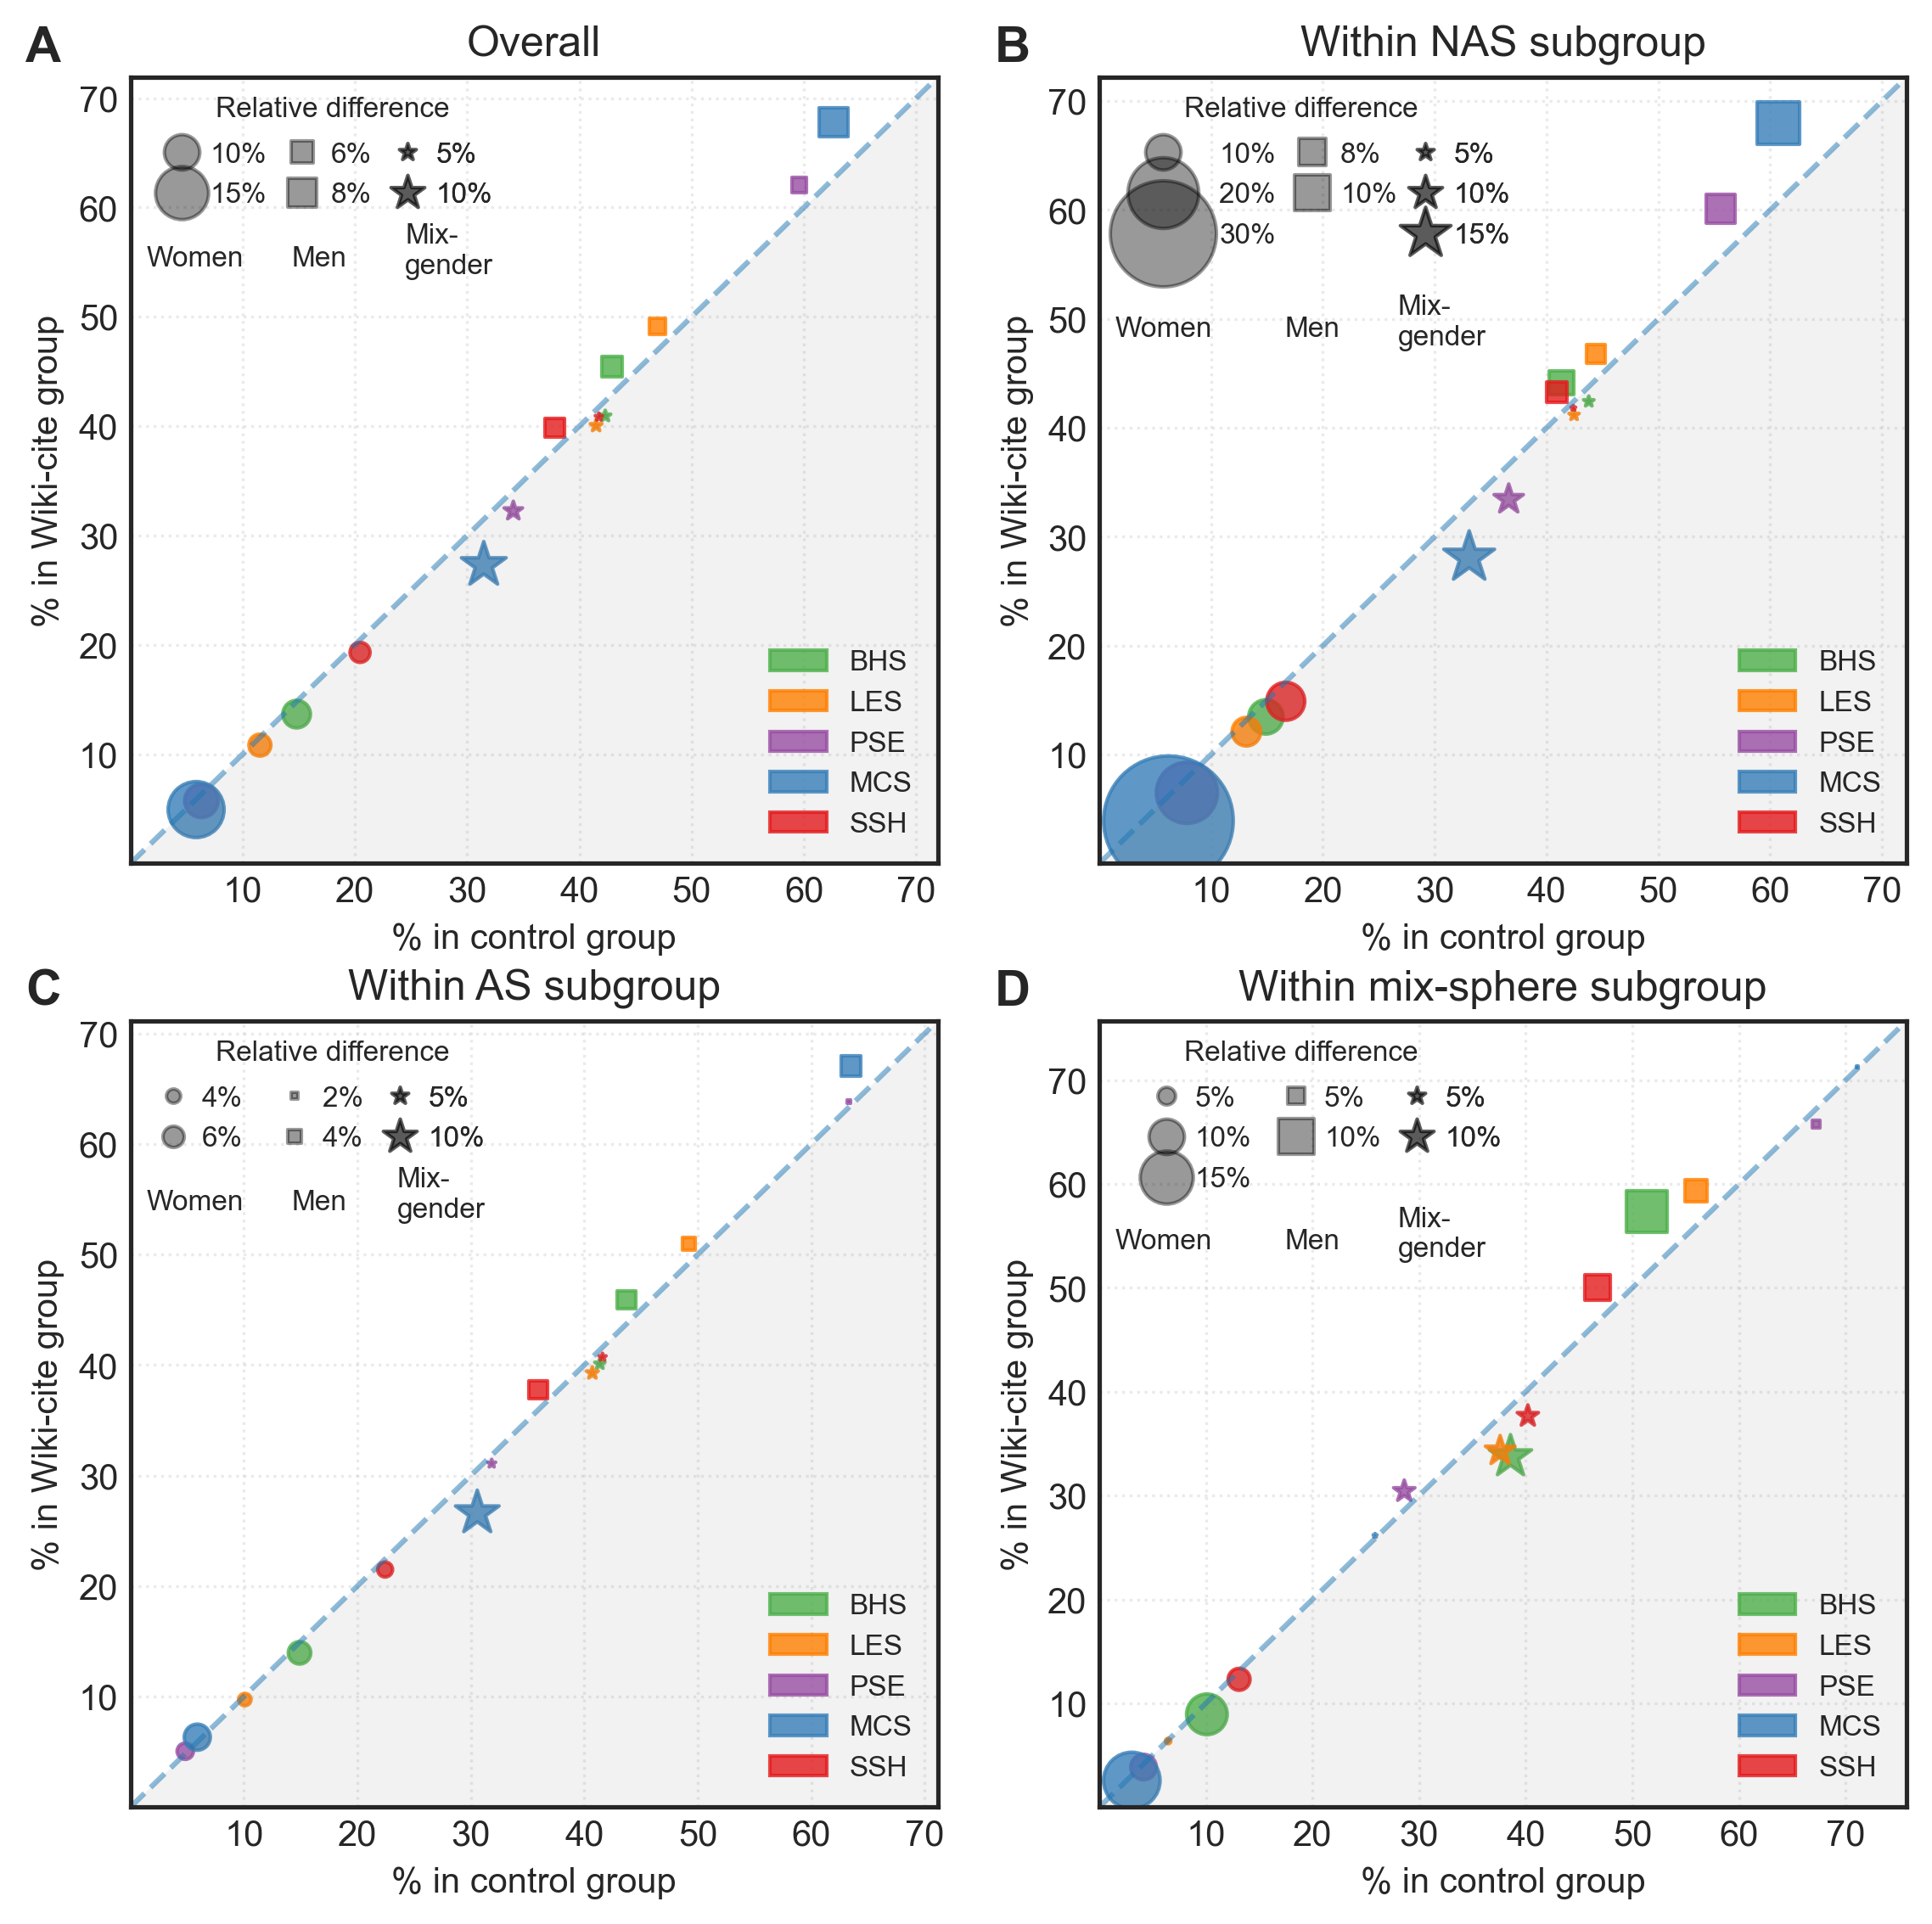

In [35]:
# merge figures

def gen_multi_gs(figsize=(9,9)):
    fig = plt.figure(constrained_layout=True, figsize=figsize,dpi=300)
    gs0 = GridSpec(2, 2,wspace=0.2, hspace=0.2, width_ratios=[1,1],height_ratios=[1,1])
    ax00 = plt.subplot(gs0[0,0])
    ax01 = plt.subplot(gs0[0,1])
    ax10 = plt.subplot(gs0[1,0])
    ax11 = plt.subplot(gs0[1,1])
    return fig, ax00, ax01, ax10, ax11

fig, ax00, ax01, ax10, ax11 = gen_multi_gs(figsize=(9,9))
markers = {"female_female":"o","male_male":"s","mix_gender":"*"}
xlabels = ["Women","Men","Mix-\ngender"]

t1 = multi_gender("female_female")
t2 = multi_gender("male_male")
t3 = multi_gender("mix_gender")

multi_scatter(ax00,
              t1,t2,t3,
              title="Overall",
              main_topic="All",
              markers=markers,
              xlabels=xlabels,
              step = 10,
              leg1pos="lower right",
              leg2pos=[0.20,0.95],
              leg2handletextpad=0.0,
              leg2num=3,
              leg3pos=[0.33,0.95],
              leg3handletextpad=0.0,
              leg3num=3,
              leg4pos=[0.48,0.95],
              leg4handletextpad=0.0,
              leg4num=3,
              leg2textpos=[0.02,0.76],
              leg3textpos=[0.20,0.76],
              leg4textpos=[0.34,0.75],
              legtitlepos=[0.25,0.95])

multi_scatter(ax01,
              t1,t2,t3,
              title="Within NAS subgroup",
              main_topic="other_other",
              markers=markers,
              xlabels=xlabels,
              step = 10,
              leg2pos=[0.25,0.95],
              leg2handletextpad=1,
              leg3pos=[0.40,0.95],
              leg3handletextpad=0.0,
              leg4pos=[0.54,0.95],
              leg4handletextpad=0.0,
              leg2textpos=[0.02,0.67],
              leg3textpos=[0.23,0.67],
              leg4textpos=[0.37,0.66],
              legtitlepos=[0.25,0.95])

multi_scatter(ax10,
              t1,t2,t3,
              title="Within AS subgroup",
              main_topic="anglo_anglo",
              markers=markers,
              xlabels=xlabels,
              step=10,
              leg2pos=[0.17,0.95],
              leg2handletextpad=0.0,
              leg3pos=[0.32,0.95],
              leg3handletextpad=0.0,
              leg4pos=[0.47,0.95],
              leg4handletextpad=0.0,
              leg2textpos=[0.02,0.76],
              leg3textpos=[0.20,0.76],
              leg4textpos=[0.33,0.75],
              legtitlepos=[0.25,0.95])

multi_scatter(ax11,
              t1,t2,t3,
              title="Within mix-sphere subgroup",
              main_topic="mix_ctry",
              markers=markers,
              xlabels=xlabels,
              step=10,
              leg2pos=[0.22,0.95],
              leg2handletextpad=0.0,
              leg3pos=[0.38,0.95],
              leg3handletextpad=0.0,
              leg4pos=[0.53,0.95],
              leg4handletextpad=0.0,
              leg2textpos=[0.02,0.71],
              leg3textpos=[0.23,0.71],
              leg4textpos=[0.37,0.70],
              legtitlepos=[0.25,0.95])

# Add panel label
label_param = {"x":-0.13,
              "y": 1.02,
              "fontsize": 14,
              }
ax00.text(s="A", transform=ax00.transAxes, fontweight="bold", **label_param)
ax01.text(s="B", transform=ax01.transAxes, fontweight="bold", **label_param)
ax10.text(s="C",transform=ax10.transAxes, fontweight="bold", **label_param)
ax11.text(s="D",transform=ax11.transAxes, fontweight="bold", **label_param)

fig.savefig(r"multi_gender.pdf", dpi=300, bbox_inches='tight')

In [36]:
# match by sphere

df_multi["bin_sig2"] = df_multi.apply(lambda x:"-".join([x["stratum_id"],str(int(x["author_1_gender"]+x["author_last_gender"]))]),axis=1)
strata_num = pd.pivot_table(df_multi,values="id",index="bin_sig2",columns="is_wiki_cited",aggfunc=lambda x: len(x.unique()))
strata_num

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/1967626920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi["bin_sig2"] = df_multi.apply(lambda x:"-".join([x["stratum_id"],str(int(x["author_1_gender"]+x["author_last_gender"]))]),axis=1)


is_wiki_cited,0,1
bin_sig2,,
1-816-1-2-0-0,4.0,2.0
1000-1605-4-2-0-0,1.0,1.0
1000-286-1-2-1-0,2.0,NaN
1000-286-3-3-0-0,4.0,1.0
1000-286-3-3-0-1,1.0,NaN
...,...,...
9999-270-2-2-0-0,NaN,1.0
9999-29-2-3-0-0,1.0,NaN
9999-29-2-3-0-1,NaN,1.0


In [37]:
strata_num_dropna = strata_num.dropna()
sum1 = strata_num_dropna[1].sum()
sum0 = strata_num_dropna[0].sum()

In [38]:
# add weights

strata_num_dropna["w"] = (strata_num_dropna[1]/sum1)/(strata_num_dropna[0]/sum0)
strata_num_dropna["w2"] = 1
a1 = pd.merge(df_multi[df_multi["is_wiki_cited"]==0],strata_num_dropna["w"],how="inner",left_on="bin_sig2",right_index=True)
a2 = pd.merge(df_multi[df_multi["is_wiki_cited"]==1],strata_num_dropna["w2"],how="inner",left_on="bin_sig2",right_index=True)
a2.rename(columns={"w2": "w"},inplace=True)
df_multi_new = pd.concat([a1,a2],axis=0,ignore_index=True)
df_multi_new

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/1638815673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_num_dropna["w"] = (strata_num_dropna[1]/sum1)/(strata_num_dropna[0]/sum0)
C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/1638815673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strata_num_dropna["w2"] = 1


,id,is_wiki_cited,stratum_id,PubYear,Code_Venue,leiden_field,Nb_Author,is_oa,author_1_gender,author_1_ctry,...,2020,male_male,female_female,mix_gender,other_other,anglo_anglo,mix_ctry,bin_sig,bin_sig2,w
0,1,0,1402-1916-1-3-0,2006,1402,1916,7,0,0,Switzerland,...,0,1,0,0,1,0,0,1402-1916-1-3-0-0,1402-1916-1-3-0-0,0.385774
1,9748,0,1402-1916-1-3-0,2006,1402,1916,7,0,0,China,...,0,1,0,0,1,0,0,1402-1916-1-3-0-0,1402-1916-1-3-0-0,0.385774
2,36277,0,1402-1916-1-3-0,2006,1402,1916,5,0,0,Switzerland,...,0,1,0,0,0,0,1,1402-1916-1-3-0-1,1402-1916-1-3-0-0,0.385774
3,44725,0,1402-1916-1-3-0,2007,1402,1916,7,0,0,Austria,...,0,1,0,0,1,0,0,1402-1916-1-3-0-0,1402-1916-1-3-0-0,0.385774
4,48302,0,1402-1916-1-3-0,2007,1402,1916,7,0,0,United States,...,0,1,0,0,0,1,0,1402-1916-1-3-0-2,1402-1916-1-3-0-0,0.385774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992875,2098918,1,1413-464-4-2-0,2018,1413,464,4,0,1,Iran,...,0,0,0,1,1,0,0,1413-464-4-2-0-0,1413-464-4-2-0-1,1.000000
992876,2098938,1,3200-3355-2-3-0,2009,3200,3355,6,0,0,United States,...,0,1,0,0,0,1,0,3200-3355-2-3-0-2,3200-3355-2-3-0-0,1.000000
992877,2098976,1,13025-43-1-3-0,2007,13025,43,6,0,1,South Korea,...,0,0,0,1,1,0,0,13025-43-1-3-0-0,13025-43-1-3-0-1,1.000000
992878,2098980,1,19450-1069-4-4-1,2017,19450,1069,10,1,1,Chile,...,0,0,1,0,1,0,0,19450-1069-4-4-1-0,19450-1069-4-4-1-2,1.000000


In [39]:
# by field
sphere = {0:"other_other",1:"anglo_anglo",2:"mix_ctry"} # whether from five eyes
genders = {0:"female_female",1:"male_male",2:"mix_gender"} # 1 male 2 female
groups = {1:"Cited",0:"Uncited"}

def multi_ctry(g):
    t = pd.DataFrame(index=fields+["All fields"],
                     columns=pd.MultiIndex.from_product([list(genders.values())+["All"], list(groups.values())+["Relative difference"]]))

    for w in [0,1]: #is_wiki_cited
        for f in fields:
            for c in genders.values():
                subdf = df_multi_new[(df_multi_new["is_wiki_cited"]==w)
                                      & (df_multi_new[f]==1)
                                      & (df_multi_new[c]==1)]
                a = subdf.loc[(subdf[g]==1),"w"].sum()/subdf["w"].sum()
                b = len(subdf)
                print(w,f,c,b)
                t.loc[f,(c,groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        for f in fields:
            subdf = df_multi_new[(df_multi_new["is_wiki_cited"]==w)
                                  & (df_multi_new[f]==1)]
            a = subdf.loc[(subdf[g]==1),"w"].sum()/subdf["w"].sum()
            t.loc[f,("All",groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        for c in genders.values():
            subdf = df_multi_new[(df_multi_new["is_wiki_cited"]==w)
                                  & (df_multi_new[c]==1)]
            a = subdf.loc[(subdf[g]==1),"w"].sum()/subdf["w"].sum()
            t.loc["All fields",(c,groups[w])] = a

    for w in [0,1]: #is_wiki_cited
        subdf = df_multi_new[(df_multi_new["is_wiki_cited"]==w)]
        a = subdf.loc[(subdf[g]==1),"w"].sum()/subdf["w"].sum()
        t.loc["All fields",("All",groups[w])] = a

    for s in list(genders.values())+["All"]:
        t.loc[:,(s,"Relative difference")] = (t.loc[:,(s,"Cited")] - t.loc[:,(s,"Uncited")])/ t.loc[:,(s,"Uncited")]

    return t.applymap(lambda x: x*100)

multi_ctry("mix_ctry")

0 BHS female_female 29406
0 BHS male_male 174527
0 BHS mix_gender 143044
0 LES female_female 12887
0 LES male_male 126879
0 LES mix_gender 98163
0 PSE female_female 3298
0 PSE male_male 193101
0 PSE mix_gender 66464
0 MCS female_female 740
0 MCS male_male 44219
0 MCS mix_gender 10416
0 SSH female_female 18049
0 SSH male_male 51968
0 SSH mix_gender 51655
1 BHS female_female 7306
1 BHS male_male 33974
1 BHS mix_gender 30061
1 LES female_female 3850
1 LES male_male 25341
1 LES mix_gender 19654
1 PSE female_female 850
1 PSE male_male 15433
1 PSE mix_gender 7156
1 MCS female_female 181
1 MCS male_male 4495
1 MCS mix_gender 1560
1 SSH female_female 3154
1 SSH male_male 7570
1 SSH mix_gender 7654


female_female                                male_male             \
                   Cited   Uncited Relative difference      Cited    Uncited   
BHS             3.038598  3.128814           -2.883373   5.825043   5.074176   
LES             4.701299  4.074823           15.374311   9.636557   8.489787   
PSE             4.000000  4.327950           -7.577498   7.114625   6.798409   
MCS             3.867403  5.931486          -34.798745  10.634038   9.006389   
SSH             5.358275  5.570352           -3.807243  10.039630  10.041606   
All fields      4.087282  4.031211            1.390919   7.915798   7.134064   

                               mix_gender                                \
           Relative difference      Cited   Uncited Relative difference   
BHS                  14.797795   4.344500  3.831097           13.400913   
LES                  13.507640   6.955327  6.134543           13.379703   
PSE                   4.651323   6.498044  5.383496           20.703051   
MCS                  18.072155   9.230769  7.566794           21.990494   
SSH                  -0.019675   7.825973  7.645443            2.361284   
All fields           10.957767   5.958028  5.301577           12.382177   

                  All                                
                Cited   Uncited Relative difference  
BHS          4.915827  4.351156           12.977494  
LES          8.168697  7.194106           13.547081  
PSE          6.813431  6.276842            8.548708  
MCS         10.086594  8.557010           17.875210  
SSH          8.314289  8.276312            0.458860  
All fields   6.809891  6.141573           10.881868

0 BHS female_female 29406
0 BHS male_male 174527
0 BHS mix_gender 143044
0 LES female_female 12887
0 LES male_male 126879
0 LES mix_gender 98163
0 PSE female_female 3298
0 PSE male_male 193101
0 PSE mix_gender 66464
0 MCS female_female 740
0 MCS male_male 44219
0 MCS mix_gender 10416
0 SSH female_female 18049
0 SSH male_male 51968
0 SSH mix_gender 51655
1 BHS female_female 7306
1 BHS male_male 33974
1 BHS mix_gender 30061
1 LES female_female 3850
1 LES male_male 25341
1 LES mix_gender 19654
1 PSE female_female 850
1 PSE male_male 15433
1 PSE mix_gender 7156
1 MCS female_female 181
1 MCS male_male 4495
1 MCS mix_gender 1560
1 SSH female_female 3154
1 SSH male_male 7570
1 SSH mix_gender 7654
0 BHS female_female 29406
0 BHS male_male 174527
0 BHS mix_gender 143044
0 LES female_female 12887
0 LES male_male 126879
0 LES mix_gender 98163
0 PSE female_female 3298
0 PSE male_male 193101
0 PSE mix_gender 66464
0 MCS female_female 740
0 MCS male_male 44219
0 MCS mix_gender 10416
0 SSH female_fem

C:\Users\Zheng\AppData\Local\Temp/ipykernel_284/799608556.py:94: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.savefig(r"multi_ctry.pdf", dpi=300, bbox_inches='tight')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


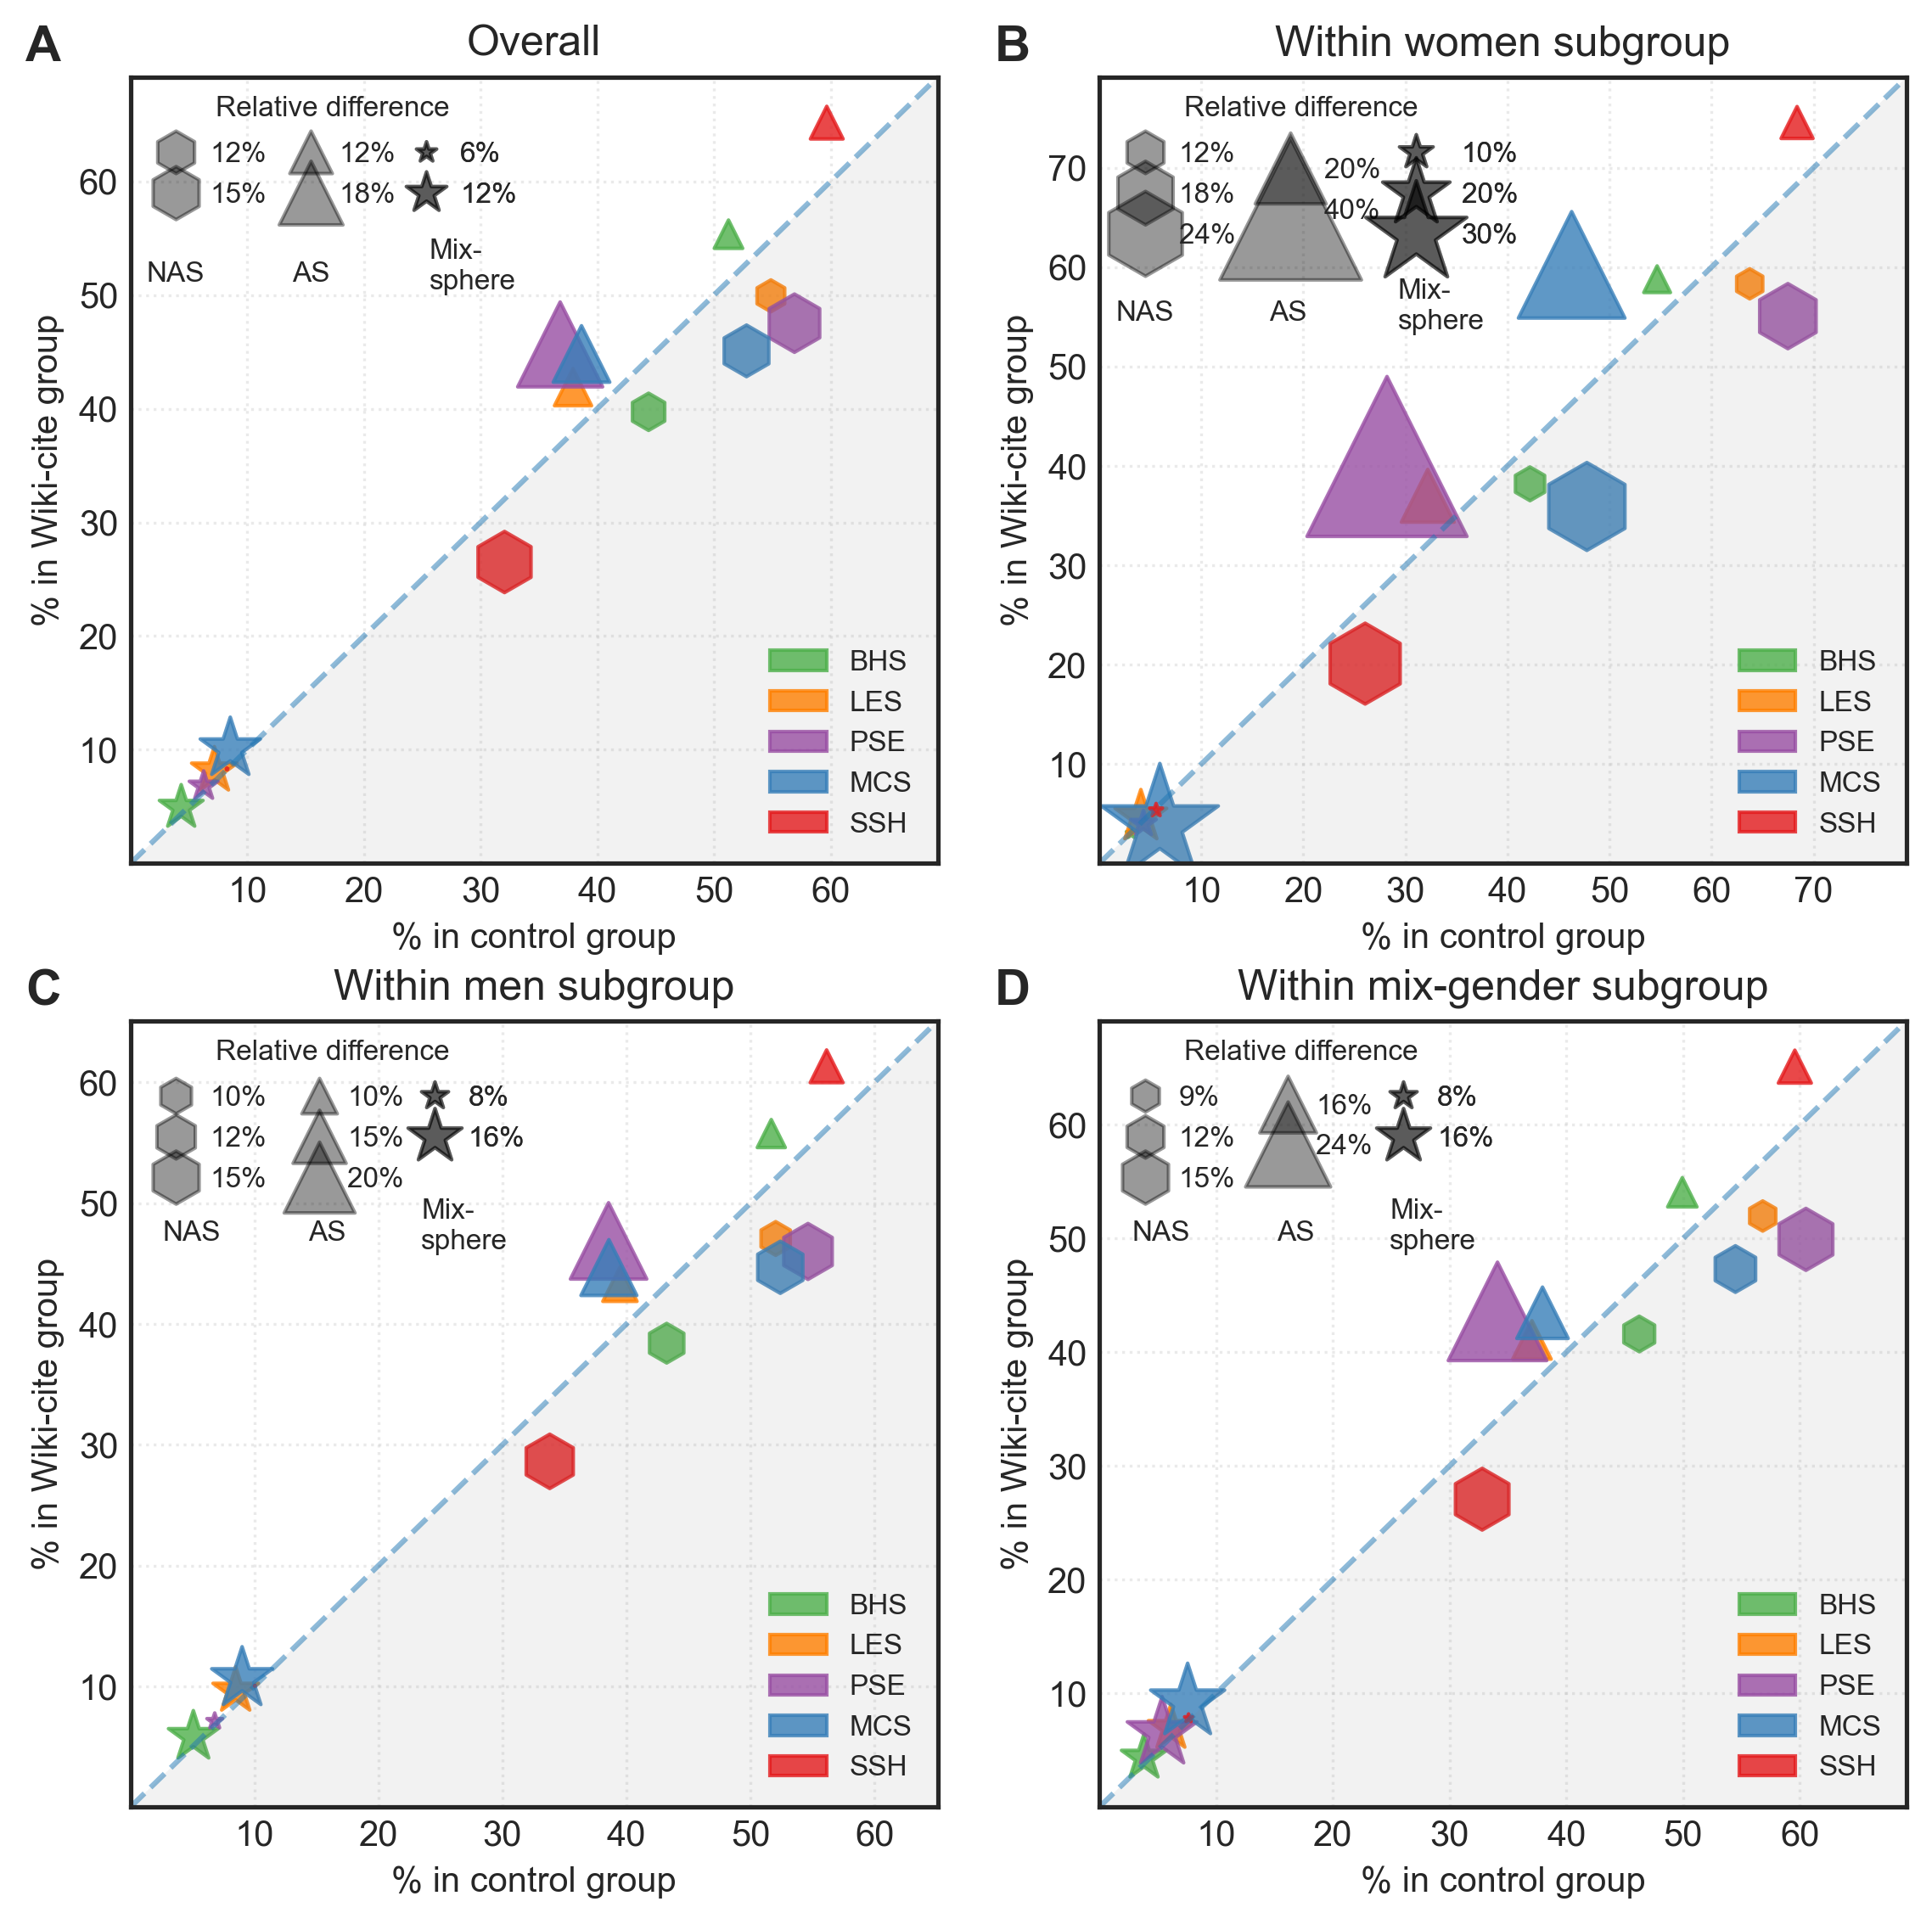

In [40]:
# merge figures
fig, ax00, ax01, ax10, ax11 = gen_multi_gs(figsize=(9,9))

markers = {"other_other":"h","anglo_anglo":"^","mix_gender":"*"}
xlabels = ["NAS","AS","Mix-\nsphere"] #,"Mix-shpere"

t1 = multi_ctry("other_other")
t2 = multi_ctry("anglo_anglo")
t3 = multi_ctry("mix_ctry")

multi_scatter(ax00,
              t1,t2,t3,
              title="Overall",
              main_topic="All",
              markers=markers,
              xlabels=xlabels,
              step=10,
              leg2pos=[0.2,0.95],
              leg2handletextpad=0.2,
              leg3pos=[0.36,0.95],
              leg3handletextpad=0.0,
              leg4pos=[0.51,0.95],
              leg4handletextpad=0.2,
              leg2textpos=[0.02,0.74],
              leg3textpos=[0.20,0.74],
              leg4textpos=[0.37,0.73],
              legtitlepos=[0.25,0.95])

multi_scatter(ax01,
              t1,t2,t3,
              title="Within women subgroup",
              main_topic="female_female",
              markers=markers,
              xlabels=xlabels,
              step=10,
              leg2pos=[0.20,0.95],
              leg2handletextpad=0.2,
              leg3pos=[0.38,0.93],
              leg3handletextpad=0.2,
              leg4pos=[0.55,0.95],
              leg4handletextpad=0.6,
              leg2textpos=[0.02,0.69],
              leg3textpos=[0.21,0.69],
              leg4textpos=[0.37,0.68],
              legtitlepos=[0.25,0.95])


multi_scatter(ax10,
              t1,t2,t3,
              title="Within men subgroup",
              main_topic="male_male",
              markers=markers,
              xlabels=xlabels,
              step=10,
              leg2pos=[0.20,0.95],
              leg2handletextpad=0.2,
              leg3pos=[0.37,0.95],
              leg3handletextpad=0.0,
              leg4pos=[0.52,0.95],
              leg4handletextpad=0.2,
              leg2textpos=[0.04,0.72],
              leg3textpos=[0.22,0.72],
              leg4textpos=[0.36,0.71],
              legtitlepos=[0.25,0.95])

multi_scatter(ax11,
              t1,t2,t3,
              title="Within mix-gender subgroup",
              main_topic="mix_gender",
              markers=markers,
              xlabels=xlabels,
              step=10,
              leg2pos=[0.20,0.95],
              leg2handletextpad=0.2,
              leg3pos=[0.37,0.94],
              leg3handletextpad=0.0,
              leg4pos=[0.52,0.95],
              leg4handletextpad=0.2,
              leg2textpos=[0.04,0.72],
              leg3textpos=[0.22,0.72],
              leg4textpos=[0.36,0.71],
              legtitlepos=[0.25,0.95])

# Add panel label
label_param = {"x":-0.13,
              "y": 1.02,
              "fontsize": 14,
              }
ax00.text(s="A", transform=ax00.transAxes, fontweight="bold", **label_param)
ax01.text(s="B", transform=ax01.transAxes, fontweight="bold", **label_param)
ax10.text(s="C",transform=ax10.transAxes, fontweight="bold", **label_param)
ax11.text(s="D",transform=ax11.transAxes, fontweight="bold", **label_param)

fig.savefig(r"multi_ctry.pdf", dpi=300, bbox_inches='tight')